# <html>
   
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: auto; margin: 10px;">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=100px width=auto style="padding:10px; vertical-align: center;">
 
</div>
   
<div   style:"text-align: center; background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  ));width: 400px; height: 30px; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Course: AI </h1>

</div>
    <div   style:"border: 3px solid green;text-align: center; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Project4: ML </h1>

</div>

   <div>    
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Mohammad Amanlou- sid:810100084 </h1>

</div>
   

</html>

# Artificial Intelligence Course - Fall 1402
## Computer Assignment #4 - Machine Learning

# Project Summary
This project aims to forecast customer purchase quantities using a machine learning approach. Initially, we will develop a Linear Regression Model from scratch. Subsequently, we will construct a Multiple Regression Model applying gradient descent. Finally, we plan to refine the model utilizing the Scikit-learn framework.

# Part1. 
## Check the data set

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

### Q1. Get the general data storage with the info and describe methods.

In [3]:
df = pd.read_csv("marketing_campaign.csv").drop(columns= ["Unnamed: 0"])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Year_Birth         2240 non-null   int64  
 2   Education          2240 non-null   object 
 3   Marital_Status     2240 non-null   object 
 4   Income             2017 non-null   float64
 5   Kidhome            2240 non-null   int64  
 6   Teenhome           2240 non-null   int64  
 7   Dt_Customer        2240 non-null   object 
 8   Recency            2240 non-null   int64  
 9   MntCoffee          2035 non-null   float64
 10  MntFruits          2240 non-null   int64  
 11  MntMeatProducts    2240 non-null   int64  
 12  MntFishProducts    2240 non-null   int64  
 13  MntSweetProducts   2240 non-null   int64  
 14  MntGoldProds       2227 non-null   float64
 15  NumWebVisitsMonth  2040 non-null   float64
 16  Complain           2240 

In [5]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2017.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52297.080317     0.437946     0.506250   
std     3246.662198    11.984069   25543.108215     0.563666     0.544538   
min        0.000000  1893.000000    2447.000000    -5.000000     0.000000   
25%     2828.250000  1959.000000   35340.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51369.000000     0.000000     0.000000   
75%     8427.750000  1977.000000   68316.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency    MntCoffee    MntFruits  MntMeatProducts  \
count  2240.000000  2035.000000  2240.000000      2240.000000   
mean     49.109375   304.239312    26.302232       166.950000   
std      28.962453   337.515534    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.000000     1.000000        16.000000   
50%      49.000000   177.000000     8.000000        67.000000   
75%      74.000000   505.000000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumWebVisitsMonth  \
count      2240.000000       2240.000000   2227.000000        2040.000000   
mean         37.525446         27.062946     43.847777           5.326961   
std          54.628979         41.280498     51.897098           2.439349   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           3.000000   
50%          12.000000          8.000000     24.000000           6.000000   
75%          50.000000         33.000000     56.000000           7.000000   
max         259.000000        263.000000    362.000000          20.000000   

          Complain  NumPurchases  UsedCampaignOffer  
count  2240.000000   2240.000000        2240.000000  
mean      0.009375     14.862054           0.271875  
std       0.096391      7.677173           0.445025  
min       0.000000      0.000000           0.000000  
25%       0.000000      8.000000           0.000000  
50%       0.000000     15.000000           0.000000  
75%       0.000000     21.000000           1.000000  
max       1.000000     44.000000           1.000000

### Q2. For each feature, obtain the number and proportion of missing data in Table 

In [6]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income               223
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoffee            205
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds          13
NumWebVisitsMonth    200
Complain               0
NumPurchases           0
UsedCampaignOffer      0
dtype: int64

In [7]:
(df.isnull().sum() / len(df)) * 100

ID                   0.000000
Year_Birth           0.000000
Education            0.000000
Marital_Status       0.000000
Income               9.955357
Kidhome              0.000000
Teenhome             0.000000
Dt_Customer          0.000000
Recency              0.000000
MntCoffee            9.151786
MntFruits            0.000000
MntMeatProducts      0.000000
MntFishProducts      0.000000
MntSweetProducts     0.000000
MntGoldProds         0.580357
NumWebVisitsMonth    8.928571
Complain             0.000000
NumPurchases         0.000000
UsedCampaignOffer    0.000000
dtype: float64

### Q3.Draw a diagram of the relationship between the 6 and Ξ characteristics. Which features are more related to the target column?

As it is clear in the picture, the AmntCoffee feature has the highest correlation with our target feature


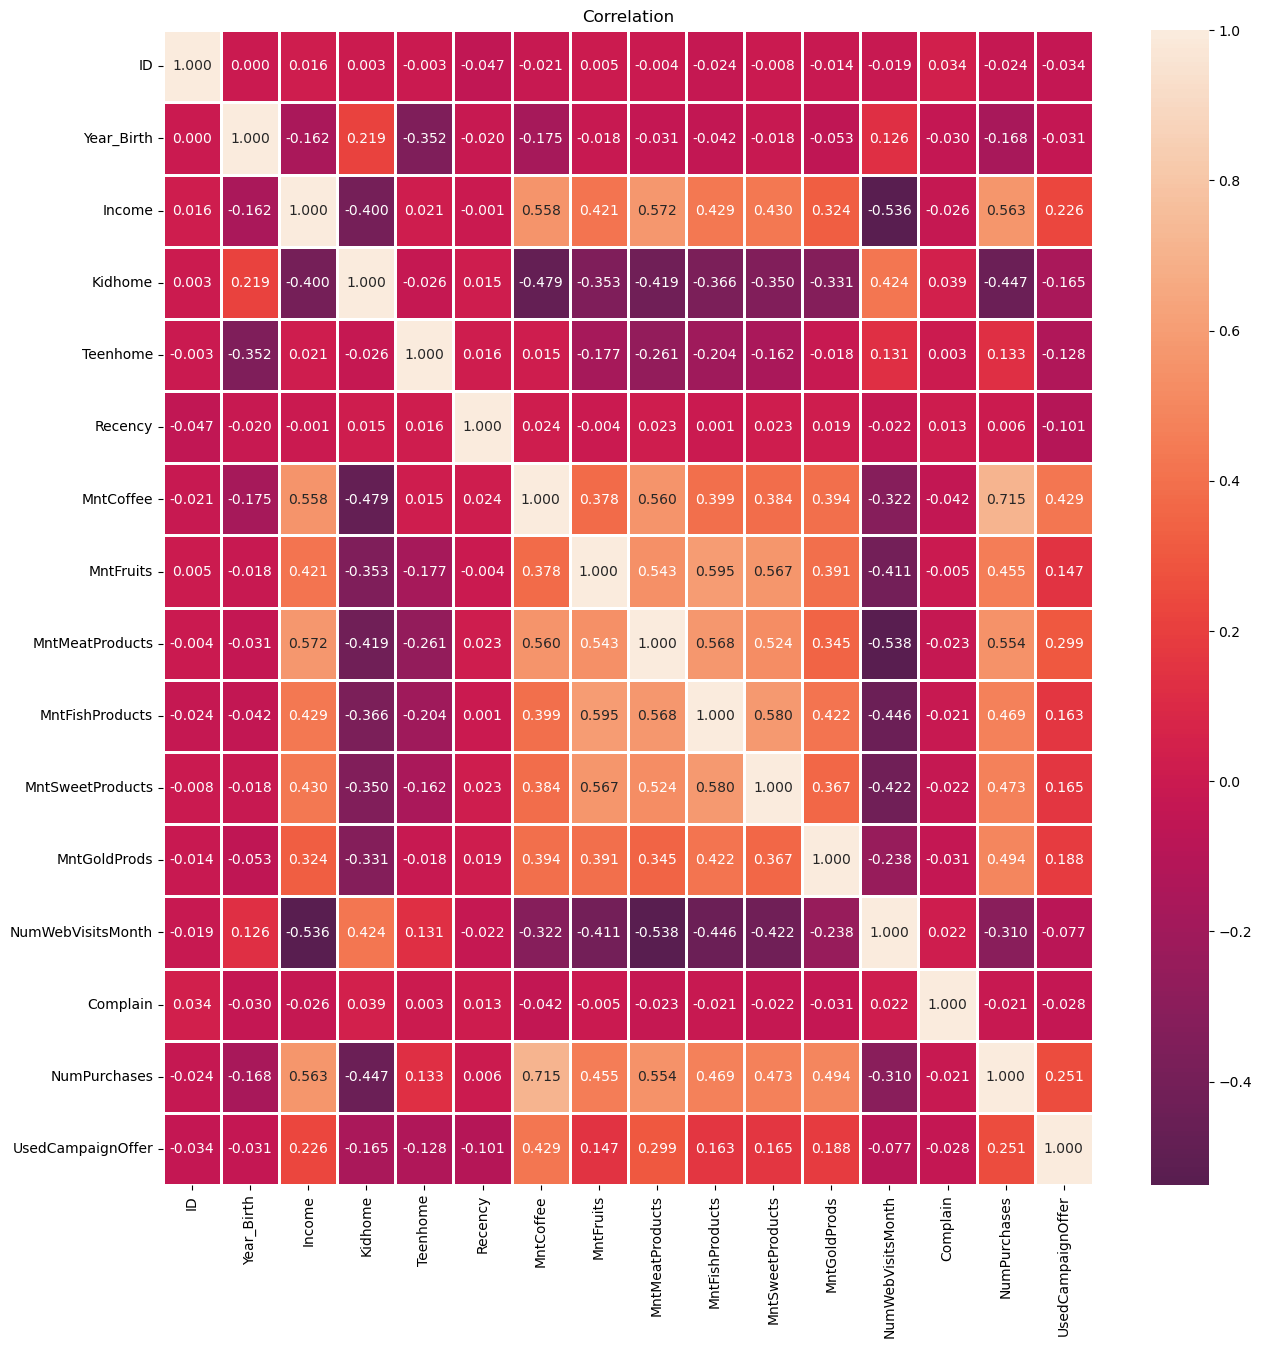

In [8]:
cor = df.corr(numeric_only=True)
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True, center=0 , fmt=".3f" , cmap = "rocket" , linewidth=0.75)
plt.title('Correlation')
plt.show()

### Q4.For the features obtained in the previous step, draw a graph of the number of observations of each unique value


In [9]:
nu = df.nunique().reset_index()
nu

index     0
0                  ID  2240
1          Year_Birth    59
2           Education     5
3      Marital_Status     8
4              Income  1810
5             Kidhome     5
6            Teenhome     3
7         Dt_Customer   663
8             Recency   100
9           MntCoffee   747
10          MntFruits   158
11    MntMeatProducts   558
12    MntFishProducts   182
13   MntSweetProducts   177
14       MntGoldProds   212
15  NumWebVisitsMonth    15
16           Complain     2
17       NumPurchases    39
18  UsedCampaignOffer     2

In [10]:
numerical_features = [ "Year_Birth" , "Income" , "Kidhome" , "Teenhome" , "Recency" , "MntCoffee" , "MntFruits" , "MntMeatProducts" , "MntFishProducts" , "MntSweetProducts" , "NumWebVisitsMonth" ]
categorical_features = ["ID" , "Education" , "Marital_Status" , "Complain" , "UsedCampaignOffer" ,"Dt_Customer" ]

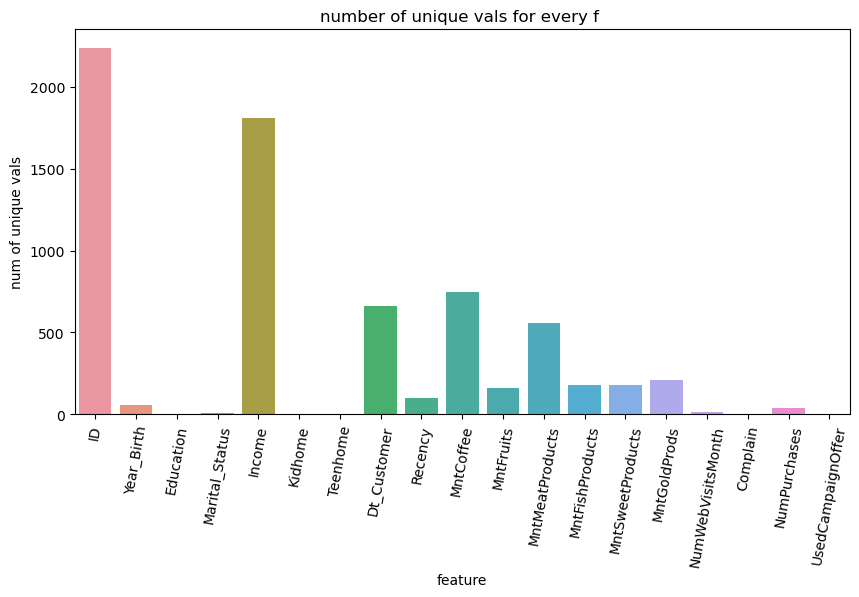

In [11]:
plt.figure(figsize=(10,5))
plt.title("number of unique vals for every f ")
plt.xticks(rotation = 80)
nu.columns = ['feature','num of unique vals']
ax = sns.barplot(x='feature', y='num of unique vals', data=nu)

### Q5.Check the relationship of the features with the target column more closely; You can use scatter and hexbin charts

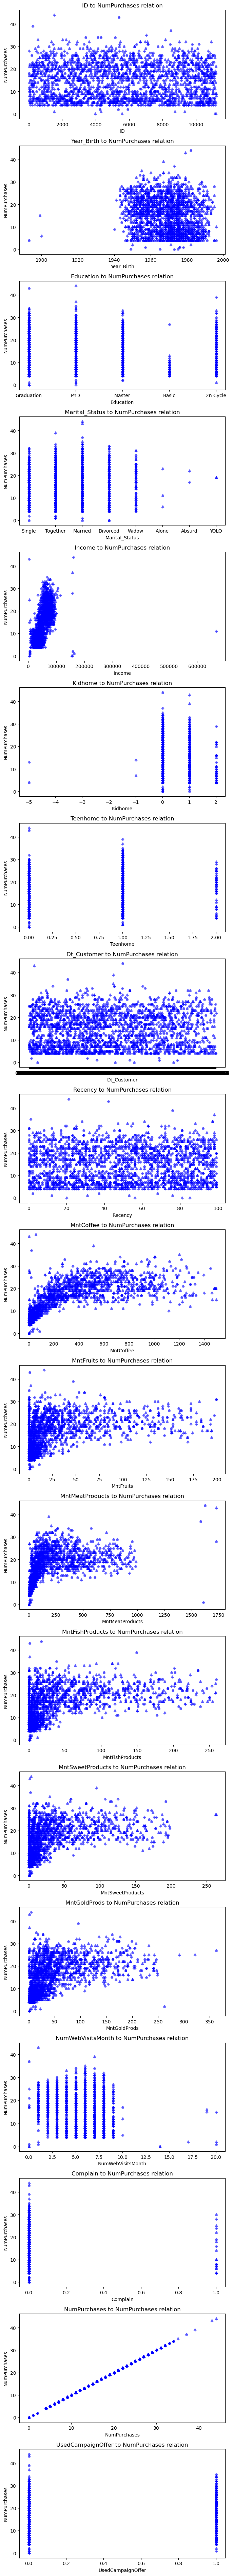

In [12]:
fig, axes = plt.subplots( nrows=len(df.columns), ncols=1, figsize=(7, 4*len(df.columns)))
for i, col in enumerate(df.columns):

    axes[i].scatter( df[col] , df["NumPurchases"] , c="blue", alpha=0.5, marker=r'$\clubsuit$',
           label="Luck")
    axes[i].set_title(col + ' to NumPurchases' + " relation")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("NumPurchases")

plt.tight_layout()

plt.show()

<Axes: xlabel='MntCoffee', ylabel='NumPurchases'>

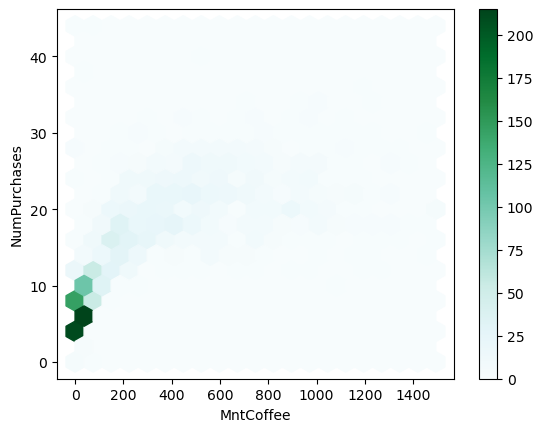

In [13]:
df.plot(kind="hexbin",y="NumPurchases", x="MntCoffee",gridsize=20)

Numerical columns: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoffee', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebVisitsMonth', 'Complain', 'NumPurchases', 'UsedCampaignOffer']


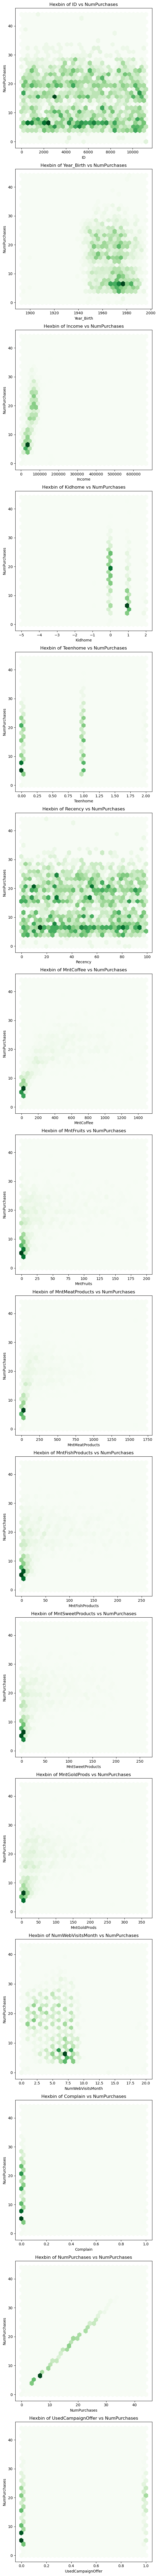

In [14]:

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

print(f"Numerical columns: {numerical_cols}")

fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(6, 6*len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    axes[i].hexbin(df[col], df["NumPurchases"], gridsize=30, cmap='Greens')
    axes[i].set_title(f"Hexbin of {col} vs NumPurchases")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("NumPurchases")

plt.tight_layout()
plt.show()

### Q.6.You can find and analyze any other review that helps you to know the collection

here we have checked the distribution of every data

Because some features had continuous values, for the features whose values ​​were continuous, the histogram chart was used to display the data distribution.

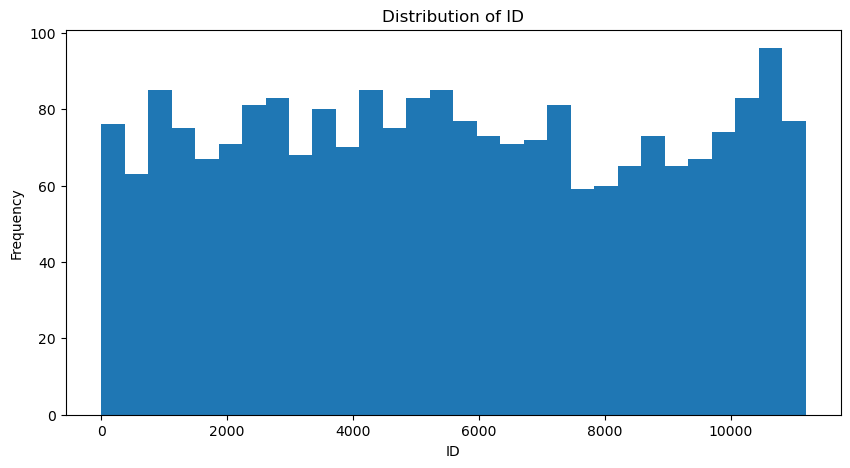

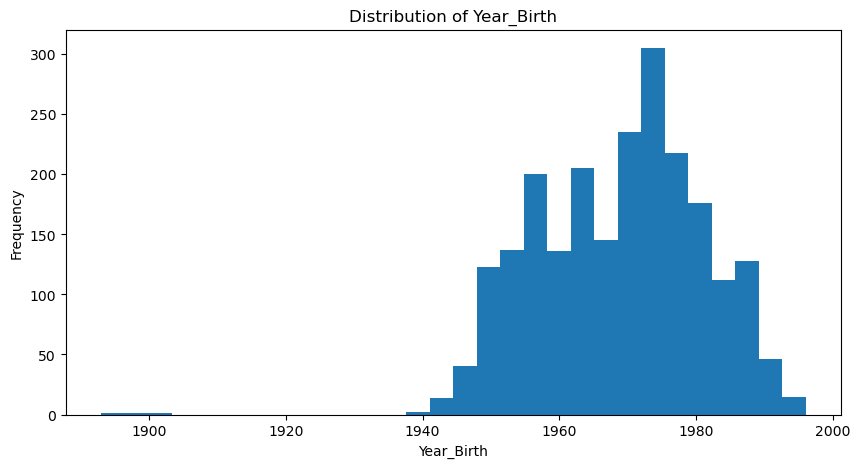

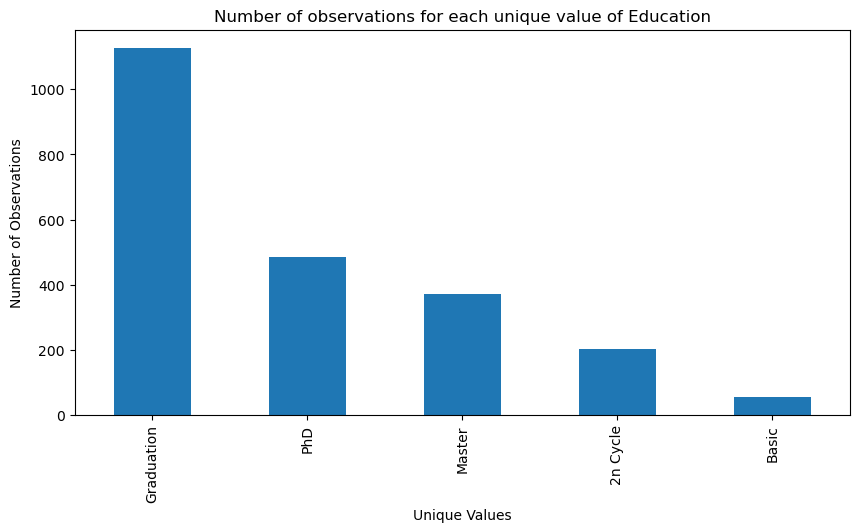

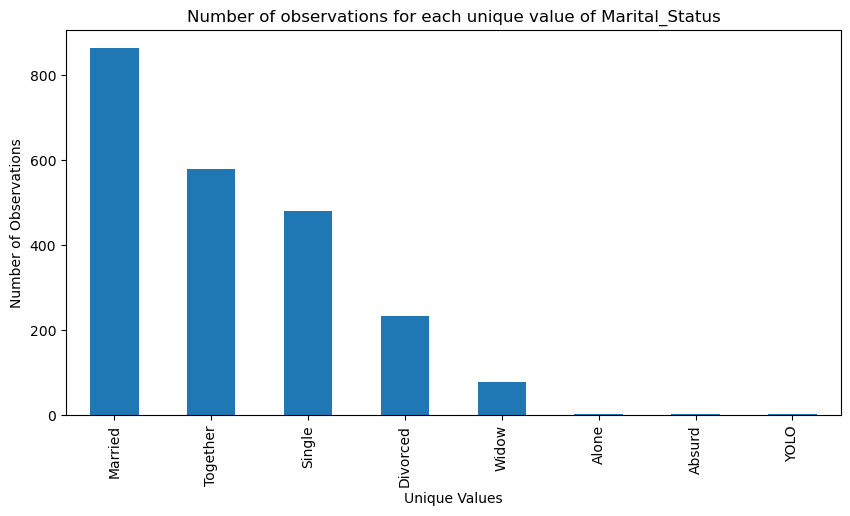

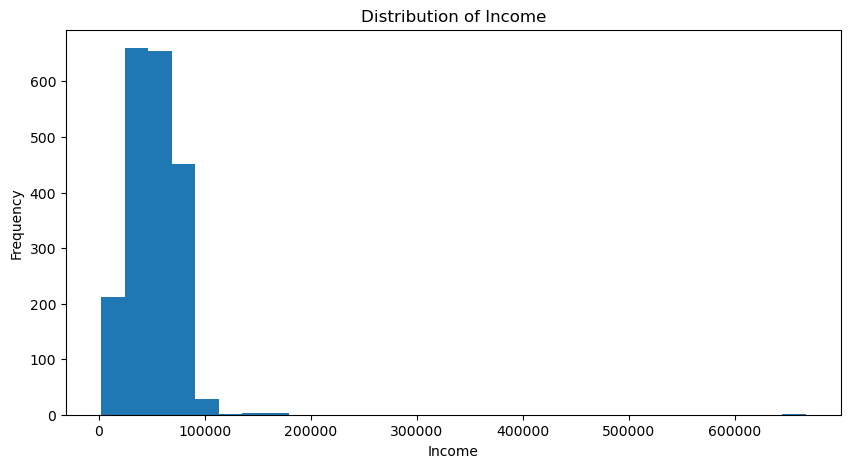

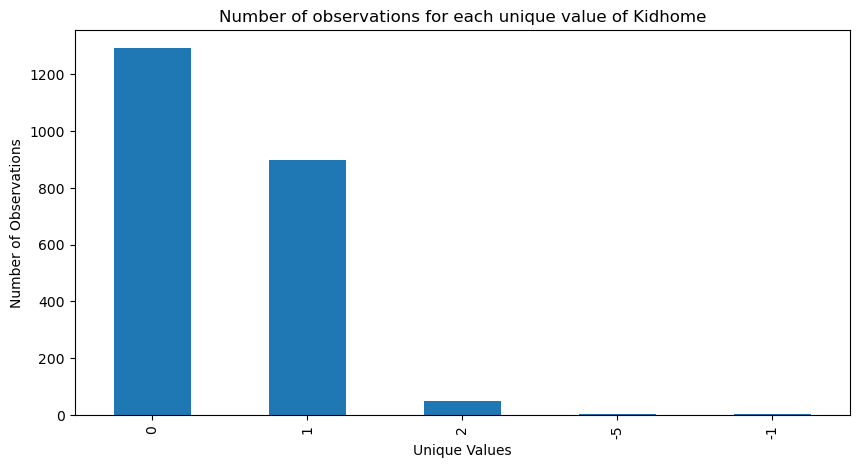

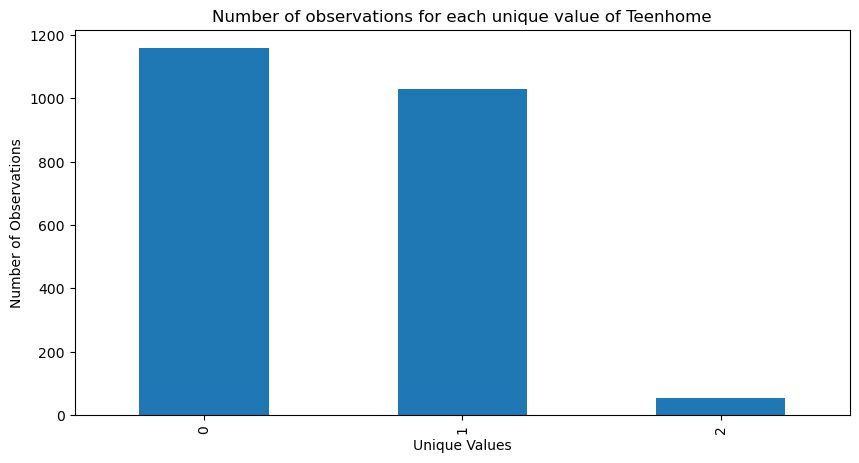

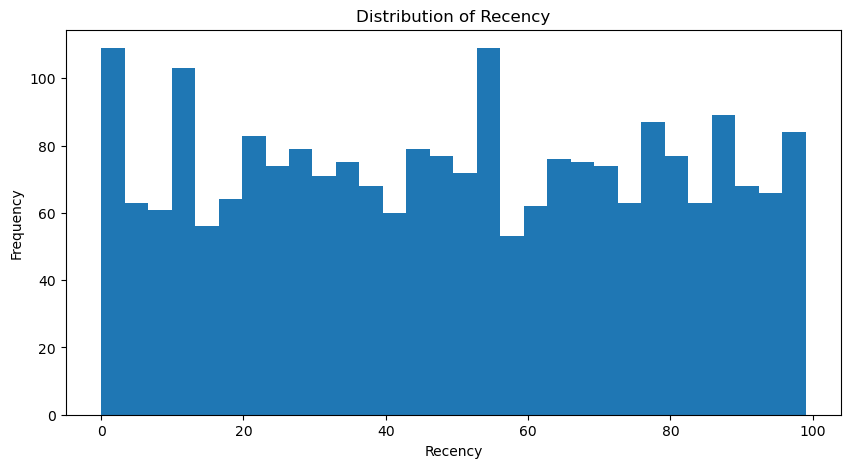

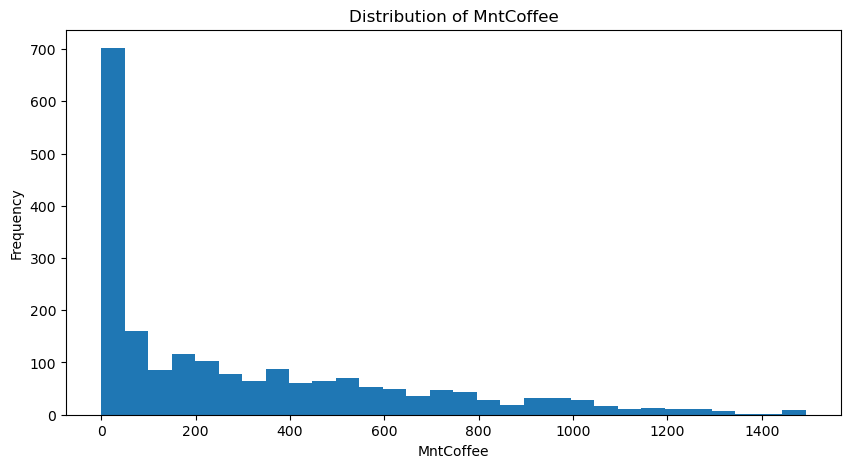

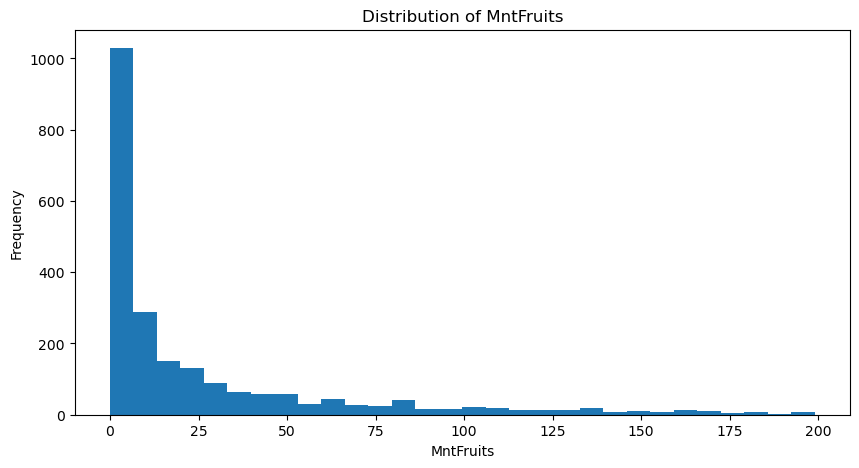

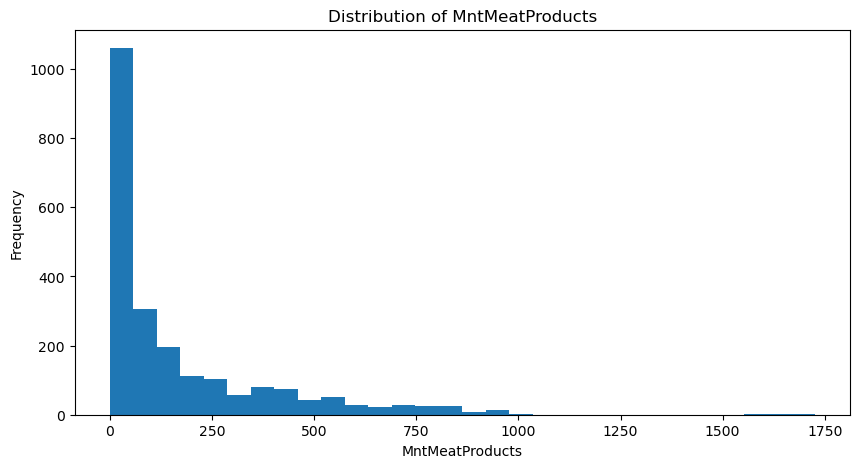

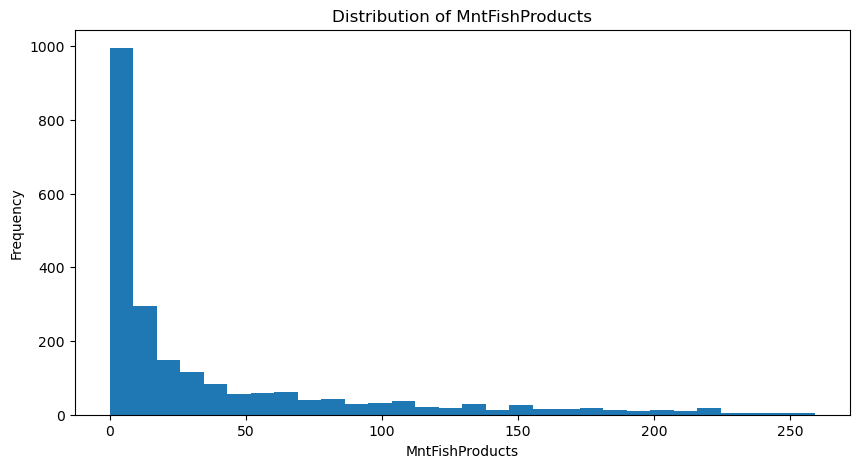

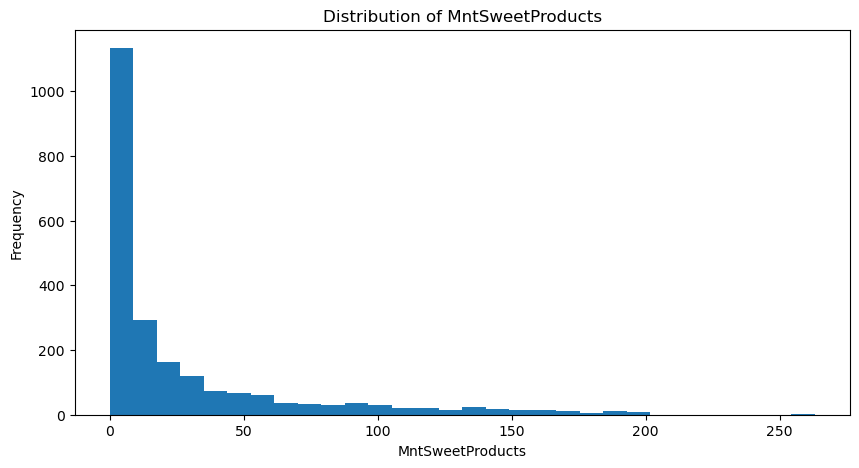

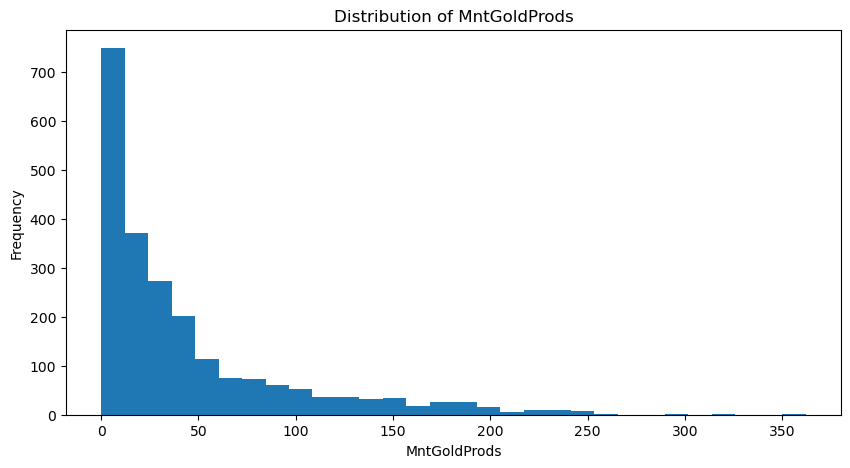

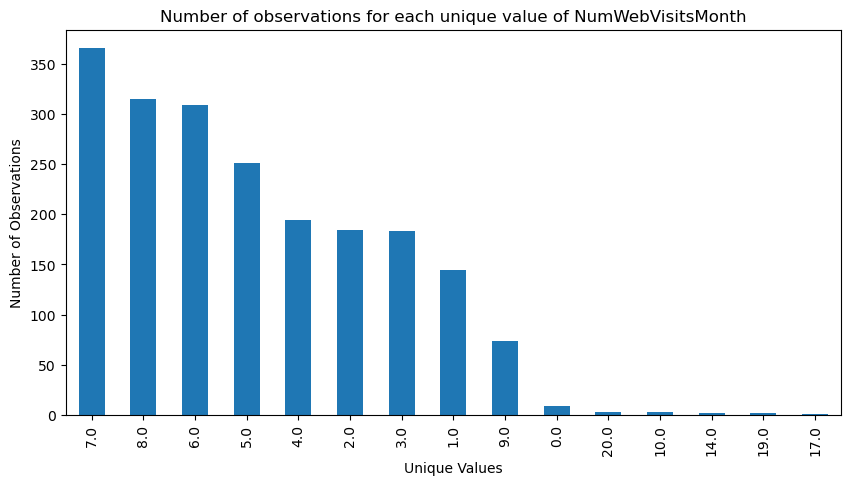

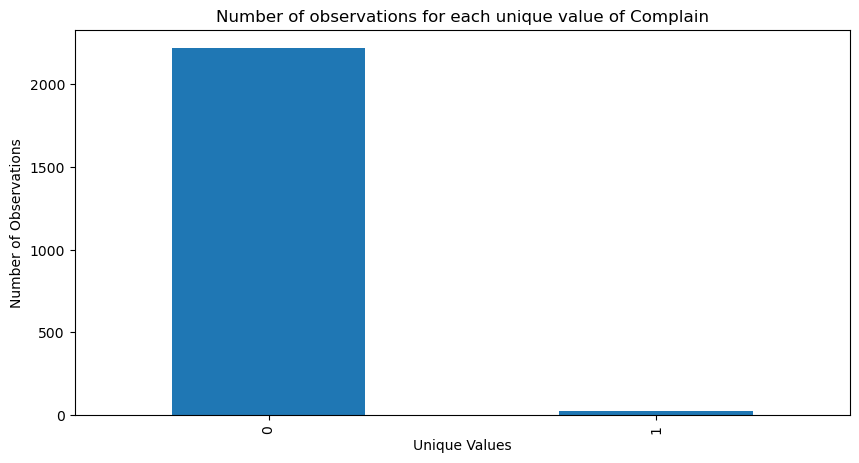

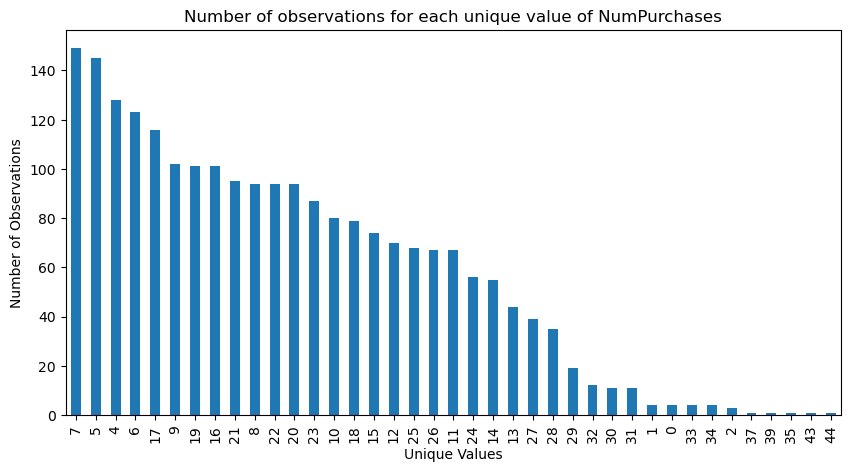

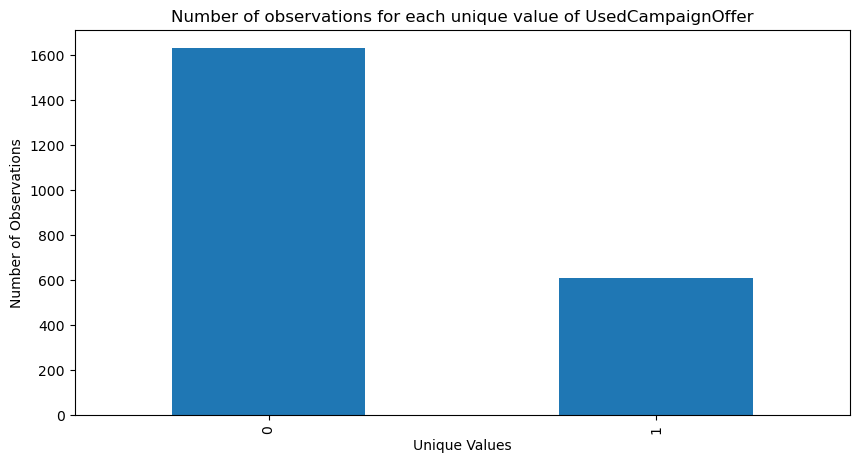

In [15]:
for column in df.columns:
    # Obtain the value counts for the current feature
    value_counts = df[column].value_counts()
    if (len(value_counts) < 50):
        plt.figure(figsize=(10, 5)) 
        value_counts.plot(kind='bar')
        plt.title(f'Number of observations for each unique value of {column}')
        plt.xlabel('Unique Values')
        plt.ylabel('Number of Observations')
        plt.show()
    elif df[column].dtype == 'int64' or df[column].dtype == 'float64':
        plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
        df[column].plot(kind='hist', bins=30)  # You can change the number of bins as needed
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Part2. 
## PreProcess of dataset

### Q.7.Two methods to solve the problem, Missing Values, deleting the entire column and matching empty values ​​with statistics 
When dealing with missing values in a dataset, there are several methods you could employ. Two common methods include deleting columns with missing values and imputing missing values with statistical measures such as mean, median, or mode. Here's an explanation and comparison of these methods, along with additional strategies:

#### 1. Deleting Columns with Missing Values

**Explanation:**
Removing the entire column with missing values is the most straightforward approach. This method is used when the column contains a high percentage of missing data, or the missing data is not significant enough to affect the analysis.

**Pros:**
- Simplifies the dataset by removing potentially noisy data.
- Fast and easy to implement.

**Cons:**
- Loses potentially useful information that could be important for the model.
- If multiple columns have missing values, you might end up with a significantly reduced dataset.
- Not a viable option if missing data is present in many columns.

#### 2. Imputation with Statistical Measures (Mean, Median, Mode)

**Explanation:**
Imputation involves replacing missing values with substitute values. For numerical columns, you might use the mean or median, while for categorical columns, the mode is typically used.

**Pros:**
- Retains all data points and columns, avoiding the loss of data.
- Relatively simple to implement using libraries that provide imputation functionalities like Scikit-learn or pandas.

**Cons:**
- Can introduce bias if the missingness is not random.
- Mean imputation doesn't account for the variance in the data and might underestimate it.
- Imputed values are estimates, not actual measurements, which might affect the authenticity of the results.

#### 3. Imputation Using Model-based Methods:

**Explanation:**
Advanced imputation techniques like K-Nearest Neighbors (KNN), multivariate imputation by chained equations (MICE), or deep learning models can predict the missing values using the information from the other features.

**Pros:**
- More accurate than mean/median/mode since they consider the correlation between features.
- Helps in retaining the structure and distribution of the data better than simple statistical measures.

**Cons:**
- More complex and computationally expensive.
- Might lead to overfitting if not properly tuned.

#### 4. Dropping Rows with Missing Values:

**Explanation:**
Instead of dropping entire columns, you could drop only the rows that contain any missing values.

**Pros:**
- Quick and easy, like column deletion.
- Useful when the dataset is large and the number of rows with missing data is minimal.

**Cons:**
- Can distort the dataset if the missingness is not random.
- Loss of valuable data if there's a significant number of rows with missing values.



### Q8. Based on the results of the previous phase, which data have the most amount of missing data? Solve the missing data problem for all features using the mentioned methods

The income columns has the most missing values

According to the distribution of the data that is drawn above, it can be seen that due to the high skewness of the data and the presence of a large number of outliers in the income and AmntCoffee features, as well as the large number of missing values ​​in these two features, due to the large number of missing values, we are unable to We don't want to delete records with null value. Also, due to the skewness of the data and the presence of outliers, the average index is associated with a large amount of error. As a result, in these two features, it is better to use the median index to fill the null values.

In [16]:
median = df['Income'].median()
mean = df['Income'].mean()
std = df['Income'].std()
min_ = df["Income"].min()
max_ = df["Income"].max()

print(f"Income Median: {median:.2f}")
print(f"Income Mean: {mean:.2f}")
print(f"Income Standard Deviation: {std:.2f}")
print(f"Income min: {min_:.2f}")
print(f"Income max: {max_:.2f}")

Income Median: 51369.00
Income Mean: 52297.08
Income Standard Deviation: 25543.11
Income min: 2447.00
Income max: 666666.00


In [17]:
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [18]:
median = df['MntCoffee'].median()
mean = df['MntCoffee'].mean()
std = df['MntCoffee'].std()
min_ = df["MntCoffee"].min()
max_ = df["MntCoffee"].max()

print(f"MntCoffee Median: {median:.2f}")
print(f"MntCoffee Mean: {mean:.2f}")
print(f"MntCoffee Standard Deviation: {std:.2f}")
print(f"MntCoffee min: {min_:.2f}")
print(f"MntCoffee max: {max_:.2f}")

MntCoffee Median: 177.00
MntCoffee Mean: 304.24
MntCoffee Standard Deviation: 337.52
MntCoffee min: 0.00
MntCoffee max: 1493.00


In [19]:
df['MntCoffee'].fillna(df['MntCoffee'].median(), inplace=True)

 Due to the fact that the number of missing data points in the feature MntGoldProd is very low, these records can be deleted. Consequently, we will remove the missing data of this feature.

In [20]:
median = df['MntGoldProds'].median()
mean = df['MntGoldProds'].mean()
std = df['MntGoldProds'].std()
min_ = df["MntGoldProds"].min()
max_ = df["MntGoldProds"].max()

print(f"MntGoldProds Median: {median:.2f}")
print(f"MntGoldProds Mean: {mean:.2f}")
print(f"MntGoldProds Standard Deviation: {std:.2f}")
print(f"MntGoldProds min: {min_:.2f}")
print(f"MntGoldProds max: {max_:.2f}")

MntGoldProds Median: 24.00
MntGoldProds Mean: 43.85
MntGoldProds Standard Deviation: 51.90
MntGoldProds min: 0.00
MntGoldProds max: 362.00


In [21]:
df.dropna(subset=['MntGoldProds'], inplace=True)


However, considering that the feature NumWebVisitsMonth has a high number of missing values, and it’s also a non-numerical or categorical feature, it would be better to use the mode index for it. As apparent in the distribution of this index, the use of mode is fairly representative of the data and is also close to the median of the numbers.

In [22]:
median = df['NumWebVisitsMonth'].median()
mean = df['NumWebVisitsMonth'].mean()
std = df['NumWebVisitsMonth'].std()
min_ = df["NumWebVisitsMonth"].min()
max_ = df["NumWebVisitsMonth"].max()

print(f"NumWebVisitsMonth Median: {median:.2f}")
print(f"NumWebVisitsMonth Mean: {mean:.2f}")
print(f"NumWebVisitsMonth Standard Deviation: {std:.2f}")
print(f"NumWebVisitsMonth min: {min_:.2f}")
print(f"NumWebVisitsMonth max: {max_:.2f}")

NumWebVisitsMonth Median: 6.00
NumWebVisitsMonth Mean: 5.33
NumWebVisitsMonth Standard Deviation: 2.44
NumWebVisitsMonth min: 0.00
NumWebVisitsMonth max: 20.00


In [23]:
df['NumWebVisitsMonth'].fillna(df['NumWebVisitsMonth'].mode()[0], inplace=True)

We need to remove all illegal values ​​from our dataframe

In [24]:
df = df[df["Kidhome"] >= 0]

In [25]:
df.isnull().sum()

ID                   0
Year_Birth           0
Education            0
Marital_Status       0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
Recency              0
MntCoffee            0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
NumWebVisitsMonth    0
Complain             0
NumPurchases         0
UsedCampaignOffer    0
dtype: int64

### Q9.What is the purpose of normalizing or standardizing in numerical characteristics? Is there a need to do this work in this project?

Normalizing or standardizing numerical features is a fundamental preprocessing step in many machine learning algorithms, particularly for those that are sensitive to the scale of the data like:

1. **Gradient Descent-Based Algorithms:** Models like Linear Regression, Logistic Regression, or Neural Networks that use gradient descent as an optimization technique perform better when the features are on the same scale, as it helps the algorithm converge faster.

2. **Distance-Based Algorithms:** Models that compute distances between data points like K-Nearest Neighbors (KNN), K-Means Clustering, or Support Vector Machines (SVM) can be biased towards features with broader ranges if the features are not standardized or normalized.

3. **Regularization:** Techniques such as Lasso or Ridge Regression that use regularization to prevent overfitting are also affected by the scale of the features. Regularization assumes that all features are centered around zero and have a variance in the same order. 

**Normalization** usually refers to the rescaling of the features to a range of [0, 1], which means that the minimum value of the feature becomes 0, and the maximum value becomes 1. This is also commonly called Min-Max Scaling.

**Standardization** refers to the process of transforming each feature to have a mean of 0 and a standard deviation of 1. This process does not bound values to a specific range.

To decide whether to normalize or standardize, consider the following:

- If your data does not follow a Gaussian distribution or you need bounded values, normalization might be the preferred approach.
- If your data follows a Gaussian distribution, standardization may be more appropriate, especially for algorithms that assume the data is Gaussian.

In this project because of using Gradient Descent, and as we saw above our data does not follow a Gaussian distribution, so we need to use Normalization

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
temp = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features, index=df.index) 
df = pd.concat([temp , df[categorical_features] , df["NumPurchases"]] , axis = 1 )

### Q10. To use the caregorical features, which are usually stored as a string or object in the data set, what methods are useful in teaching the model? Are all this features need to this methods


1. **One-Hot Encoding**: This method creates a binary column for each category and is useful when categories do not have an ordinal relationship. For models that assume linearity, like logistic regression, it’s often necessary to use one-hot encoding.

2. **Label Encoding**: This technique assigns a unique integer to each category. It is ideal for ordinal variables where the order matters but can introduce a notion of order for nominal variables that don't have any order which might not be suitable for some algorithms.

3. **Feature Hashing**: Also known as the hashing trick, it is a fast and space-efficient way of vectorizing features, useful when you have a large number of categories.

4. **Binary Encoding**: This method combines the features of both the one-hot encoding and hashing, converting categories into binary numbers and then splitting those numbers into separate columns.

5. **Target Encoding**: Sometimes known as mean encoding. This replaces categorical values with the mean target value for that category. It can be very powerful but can also lead to overfitting if not regularized properly.

6. **Frequency or Count Encoding**: Here you replace categories with their frequencies or count in the dataset. It is simple and can be useful when the frequency is important.

7. **Embedding Layers**: Mostly used in neural networks where high-dimensional categorical variables are converted into learnable vectors.

8. **Ordinal Encoding**: When the categorical feature is ordinal, the categories can be transformed into numbers in a meaningful order.

Not all methods are suitable for every algorithm. Linear models benefit from one-hot encoding, while algorithms such as tree-based models can handle label encoding well because they are not influenced by the ordinal nature implied by integers.

The choice of which encoding method to use depends on:
- The model being used.
- The nature of the categorical features (ordinal or nominal).
- The number of categories (high cardinality categories might require more sophisticated encoding methods).
- The size of the dataset (one-hot encoding can significantly increase the dimensionality of your dataset).

Before applying these methods, you should analyze your data closely and understand the nature of your categorical variables, along with the requirements of the models you plan to use.

beacause we are going to use linear regression we should use One_Hot encoding

In [27]:
categorical_ordinal_features = ["Education" , "Dt_Customer"]
categorical_nominal_features = ["Marital_Status" ]

In [28]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for column in categorical_ordinal_features:
    df[column] = encoder.fit_transform(df[column])

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define a transformer for the one-hot encoded features
column_transformer = ColumnTransformer(
    transformers=[
        ('category_one_hot', OneHotEncoder(), categorical_nominal_features)
    ],
    remainder='passthrough'
)

# Fit the transformer and apply it to the dataframe
df_encoded = column_transformer.fit_transform(df)

# Get the feature names for the one-hot encoded columns
one_hot_features = column_transformer.named_transformers_['category_one_hot'].get_feature_names_out(categorical_nominal_features)

# Combine the new one-hot encoded column names with the remainder column names
new_column_names = one_hot_features.tolist() + df.drop(columns=categorical_nominal_features).columns.tolist()

# Convert the resulting encoded data back to a DataFrame
df = pd.DataFrame(df_encoded, index=df.index, columns=new_column_names)

### Q11.Is it possible to delete some columns? Why?
Yes, it is possible to delete or drop columns from a DataFrame, and there are a variety of reasons why you might want to do this:

1. **Irrelevant Data**: The column may not contain information relevant to the problem you are trying to solve or the analysis you are conducting.

2. **Data Leakage**: The column could contain data that would not be available at the time of making predictions (future data), and using this data during training could lead to overfitting.

3. **Redundant Information**: Sometimes different columns can contain overlapping information. To reduce dimensionality and multicollinearity (which can be problematic for certain types of models), you might drop one of the redundant columns.

4. **Noisy Data**: If a column contains too much noise, it might actually decrease the model's performance.

5. **Too Many Missing Values**: If a column contains too many missing values, it might not be practical to impute or fill those missing values, and dropping the column could be a better solution.

6. **Computational Efficiency**: Reducing the number of features can lead to faster computation, which can be important when working with large datasets or complex models.

7. **Improve Model Performance**: Sometimes models perform better with a smaller set of features. Dropping irrelevant or less important features can potentially improve model performance.


Yes, here, as you can see in the correlation chart, for example, there is no relationship between recency and our target column, which can be deleted.


In [30]:
df = df.drop(columns=['Recency'])

### Q12.To train and finally evaluate the machine learning model, it is necessary to divide the data into two classes, test and train. What is the ratio of this part? What methods are there for dividing and making these two parts?

Dividing data into training and testing sets is a critical step in evaluating the performance of a machine learning model. The ratio for splitting the data into training and testing sets can vary depending on the dataset size, the diversity of the data, the particularities of the problem, and the type of machine learning algorithm you are using. However, there are some common conventions:

1. **Small Datasets**: If you have a small dataset, you might need to use as much data as possible for training, such as an 80/20 split or a 90/10 split, where the larger portion is for training.

2. **Large Datasets**: With large datasets, a smaller percentage can be used for testing, such as a 98/2 split or a 99/1 split, since you would still have a significant amount of data for evaluating the model's performance.

3. **Standard Split**: A common default split that is often used as a starting point is 70/30 or 75/25 for training/testing.

4. **Stratified Sampling**: To ensure that the distribution of classes in both the training and testing sets reflects the original dataset, especially in cases where the dataset has imbalanced classes.

5. **Cross-Validation**: In this approach, the dataset is divided into 'k' smaller sets. The model is trained on 'k-1' of these folds and validated on the remaining part. This process is repeated 'k' times (folds), with each of the 'k' subsets used exactly once as the validation data. The most common form is k-fold cross-validation, often with `k=10`.



In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["ID" , "NumPurchases"]),  # features
    df['NumPurchases'],                 # target
    test_size=0.2,               # 75/25 split, a quarter of data used for testing
    random_state=42              # Seed for random number generator for reproducibility
    #,stratify=df['NumPurchases']         # Stratify split based on labels, if classification problem
)

### Q13. Sometimes, in addition to the above two categories, there is also a second category. Explain about this process (validation).

The process you're referring to involves dividing your data into three sets: a training set, a validation set, and a test set.

1. **Training Set**: This is the portion of the data on which the machine learning model is trained. The model learns to make predictions from this data.

2. **Validation Set**: After the model has been trained on the training data, it is then tuned on the validation set. The validation set is used to optimize the model's hyperparameters and to provide an unbiased evaluation of a model fit. The idea is that you want to fine-tune your model on data it hasn't seen before without touching the test set, which should be reserved for the final evaluation.

3. **Test Set**: This is the final, untouched set of data that the model is evaluated on after all training and tuning have been completed. It provides an unbiased assessment of the model's final tuned performance.

The presence of a separate validation dataset helps in avoiding overfitting. Overfitting is when the model learns to make predictions very well on the training data but does not generalize well to new, unseen data. Having a validation set helps to ensure that improvements to the model actually make it better at making predictions on data it has not seen during training, not just memorizing the training data more closely.

The ratio in which you split your data into these three sets can vary greatly and is often dependent on the size of your dataset:

- A large dataset might have enough data to afford a smaller test set, such as an 80/10/10 or 70/15/15 split for training, validation, and testing, respectively.
- Smaller datasets might not have the luxury of allocating a large percentage of data away from training, so they might use something like a 60/20/20 split.


### Q14.How is the K-Fold Cross Validation method performed? explain.

K-Fold Cross Validation is a statistical technique used to estimate the performance of machine learning models when making predictions on new unseen data. It is primarily used to assess the effectiveness of a model and to mitigate problems like overfitting or underfitting and to give insight into how the model will generalize to an independent dataset.

Here’s how K-Fold Cross Validation works:

1. **Splitting the Dataset**: The entire dataset is randomly partitioned into `k` equal-sized subsamples or folds. If the data is not shuffled initially, it is generally a good idea to shuffle it before applying k-fold splitting to avoid bias.

2. **Model Training and Validation**: Each fold acts as a validation set exactly once, while the k-1 remaining folds form the training set. The model is trained on the training set and validated on the validation set. This process is repeated `k` times, with each of the `k` subsamples used once as the validation data.

3. **Performance Measurement**: For each iteration, a model performance metric (like accuracy for classification problems, mean squared error for regression problems, etc.) is calculated.

4. **Average Performance**: After all `k` iterations, the performance measure is averaged over the number of folds to give a single estimation of model performance.

K-Fold Cross Validation is an especially useful technique when the size of the dataset is limited because it allows for the maximization of both the training and testing data so that the data available is used very efficiently. Each data point gets to be in a test set exactly once, and gets to be in a training set k-1 times.

It should be highlighted that the choice of `k` has a significant effect on the bias-variance tradeoff. A lower value of `k` (like 2 or 3) will have a higher variance but lower bias, as the training datasets will be smaller; conversely, a higher value of `k` (like 10 or 20) will have a higher bias but lower variance, as the training datasets will be closer in size to the original dataset. A common default choice for `k` is 5 or 10.

for example here we have predicted the Complain for a classification problem

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Split feature and target variables
X = df.drop('Complain', axis=1)
y = df['Complain']
scores = cross_val_score(model, X, y, cv=kf)

print(scores)
print(scores.mean())

[0.99101124 0.99101124 0.99325843 0.99099099 0.98648649]
0.9905516752707765


and also hre we have predict our goal feature using LinearRegression

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

kf = KFold(n_splits=5, random_state=42, shuffle=True)

X = df.drop('NumPurchases', axis=1)
y = df['NumPurchases']

scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)

# The scores are usually negative because cross_val_score uses utility functions (higher is better),
# rather than cost functions (lower is better). We can negate the scores to make them positive.
mse_scores = -scores

# Calculate RMSE for each fold
rmse_scores = np.sqrt(mse_scores)

print(rmse_scores)
print(rmse_scores.mean())

[4.92170743 5.11797588 4.81550073 4.79852867 4.79432831]
4.889608204325069


# Part3.
## Training, evaluation and regulation

## phase1. Linear Regression

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



### Q15.Explain the reason for obtaining the mentioned values:

In simple linear regression, we have a model of the form:

$[ f(x) = \alpha x + \beta ]$

Here, $(\alpha)$ represents the slope of the line (how much $( y )$ changes for a change in $( x )$), and $(\beta)$ represents the y-intercept (the value of $( y )$ when $( x = 0 )$).

The goal of linear regression is to find the values of $(\alpha)$ and $(\beta)$ that best fit the data. "Best fit" typically means that the sum of the squared differences between the observed values ($( y_i )$) and the values predicted by our model ($( f(x_i) = \hat{\beta} + \hat{\alpha} x_i )$) is minimized. This sum of squared differences is known as the Residual Sum of Squares (RSS):

$[ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} x_i))^2 ]$

To minimize the RSS, the partial derivatives of RSS with respect to $(\alpha)$ and $(\beta)$ are set to zero. The equations obtained from these steps provide us with the least squares estimates for $(\alpha)$ and $(\beta)$.

**Step 1: Compute RSS of the Training Data**

This equation represents the sum of the squared residuals, which we are trying to minimize through selection of appropriate $(\alpha)$ and $(\beta)$ values.

**Step 2: Compute the Derivatives of the RSS Function in Terms of $(\alpha)$ and $(\beta)$**

Setting each partial derivative equal to zero provides the minimum point of RSS, assuming a convex loss surface.

First equation:

$[ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} x_i) = 0 ]$

By solving this equation, we get the expression for \(\beta\):

$[ \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x} ]$

Here, $( \hat{x} )$ is the mean of all $( x )$ values and $( \hat{y} )$ is the mean of all $( y )$ values.

Second equation:

$[ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{beta} x_i + 2 \hat{alpha} x_i^2) = 0 ]$

By solving the above with the first equation, we get the expression for $(\alpha)$:

$[ \hat{\alpha} = \frac{\Sigma (x_i - \hat{x})(y_i - \hat{y})}{\Sigma (x_i - \hat{x})^2} ]$

This represents the slope ($(\alpha)$) as the ratio of the covariance of $( x )$ and $( y ) $to the variance of $( x )$, giving the average change in $( y )$ per unit change in $( x )$.

Finally, using $(\alpha)$ from the second equation into the first, we get $(\beta)$:

$[ \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x} ]$

This $(\beta)$ value ensures that our line passes through the centroid ($( \hat{x}, \hat{y} )$) of the data, providing the best balance between all points.

Essentially, these steps are used to arrive at the least squares estimates for the regression line, which is the line that minimizes the sum of the squared residuals (differences) between the predicted values and the actual values of the target variable.

In [34]:
def linear_regression(input, output):
    sum_input = np.sum(input)
    sum_output = np.sum(output)
    mult_in_out = np.sum(input * output)
    SSi = np.sum(input ** 2)
    intercept = (mult_in_out - (len(input) * (sum_input / len(input)) * (sum_output / len(output)))) / (SSi - len(input) * ((sum_input / len(input)) ** 2))
    slope = (sum_output / len(output)) - intercept * (sum_input / len(input))
    print ("intercept: " , intercept)
    print ("slope: " , slope)
    return (intercept, slope)

### Q16.In your opinion, which feature gives us a more accurate output than other features? Explain the reason for your choice

Because there was the highest correlation between the MntCoffee feature and our target feature, and the most similarity in linear increase or decrease, the use of this feature will probably give us the most accuracy. As a result, at this stage, this feature was used to predict the NumPurchases feature.



In [35]:
def get_regression_predictions(input, intercept, slope):
    predicted_values = [(intercept * x) + slope for x in input]
    return (predicted_values)

In [36]:
intercept, slope = linear_regression(X_train['MntCoffee'], y_train)
y_pred = get_regression_predictions(X_test['MntCoffee'], intercept, slope)

intercept:  24.37756062027725
slope:  10.036584946790207


### Q17.Read about RMSE, MSE, RSS and R2 score methods and explain each one in your report.

1. **Mean Squared Error (MSE)**:
   - Definition: MSE measures the average squared difference between the estimated values and the actual value. It is a way to quantify the error of a model's predictions.
   - Formula: $[ MSE = \frac{1}{n} \Sigma_{i=1}^{n} (y_i - \hat{y_i})^2 ]$
   - Explanation: For each point, you calculate the square of the difference between the prediction $((\hat{y_i})$) and the actual value $((y_i)$), and then average those values.

2. **Root Mean Squared Error (RMSE)**:
   - Definition: RMSE is the square root of the mean squared error. It measures how well a regression model predicts the outcome of interest.
   - Formula: $[ RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \Sigma_{i=1}^{n} (y_i - \hat{y_i})^2} ]$
   - Explanation: RMSE is simply the square root of MSE and provides error terms in the same units as the response variable, which can be useful for interpretation.

3. **Residual Sum of Squares (RSS)**:
   - Definition: RSS is the sum of the squared differences between the observed dependent variable and the value predicted by the model.
   - Formula: $[ RSS = \Sigma_{i=1}^{n} (y_i - \hat{y_i})^2 ]$
   - Explanation: Instead of averaging the square residuals (as in MSE), in RSS, you sum them up. This gives you a total measure of the model's error.

4. **R-squared (R²) Score**:
   - Definition: R² is the proportion of variance in the dependent variable that can be predicted from the independent variable(s). It is a statistic that will give some information about the goodness of fit of a model.
   - Formula: $4[ R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\Sigma (y_i - \hat{y_i})^2}{\Sigma (y_i - \bar{y})^2} ]$
   - Explanation: TSS or Total Sum of Squares is the total variance in the response variable. R² compares the fit of the chosen model with that of a horizontal straight line (mean of the observed data). An R² of 1 indicates that the regression predictions perfectly fit the data, while an R² of 0 indicates no linear relationship between the dependent and independent variables.

Each of these metrics provides different information:

- **MSE** and **RMSE** measure the average error magnitude and can be used to compare different models. Since these are both error metrics, lower values imply a better fit.
- **RMSE** is more sensitive to outliers than MSE since the errors are squared before taking the mean, thus highlighting larger errors.
- **RSS** provides a single sum of error magnitude, useful for optimization purposes such as in gradient descent.
- **R²** is a relative measure of fit; it tells us how much of the variability in the response data can be explained by the model. An R² score will normally be between 0 and 1, and a higher score indicates a better fit.

It's worth noting that while a higher R² is generally better, it is not a definitive measure of model quality. For example, a high R² value does not indicate that the model has the correct regression function or that it will make good predictions on new data. Additionally, in models with a large number of predictors, R² will tend to overstate the model's effectiveness because it will always increase as more predictors are added regardless of their relevance. This is why it is sometimes better to look at the adjusted R² which penalizes more complex models, or to use other information criteria like AIC or BIC for model selection.

### Q18. Using the RMSE method and R2 score, evaluate the predicted value. Do the above operation on several other features as well. What do you make of the obtained values?

In [37]:
def get_root_mean_square_error(predicted_values, actual_values):
    if len(predicted_values) != len(actual_values):
        raise ValueError("The lengths of predicted and actual values must match.")
    residuals = np.subtract(predicted_values, actual_values)
    mean_squared_error = np.mean(np.square(residuals))
    root_mean_square_error = np.sqrt(mean_squared_error)
    
    return root_mean_square_error


The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

In [38]:
def get_r2_score(predicted_values, actual_values):
    if len(predicted_values) != len(actual_values):
        raise ValueError("The lengths of predicted and actual values must match.")

    mean_actual_values = sum(actual_values) / len(actual_values)
    total_sum_of_squares = sum((y_i - mean_actual_values) ** 2 for y_i in actual_values)
    residual_sum_of_squares = sum((y_i - y_hat) ** 2 for y_i, y_hat in zip(actual_values, predicted_values))
    r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)
    
    return r_squared


In [39]:

for feature in X_train.columns:
    print(feature + ":")
    intercept, slope = linear_regression(X_train[feature], y_train)
    y_pred = get_regression_predictions(X_test[feature], intercept, slope)
    print ("R2 score: " , get_r2_score(y_pred, y_test))
    print ("RMSE score: " , get_root_mean_square_error(y_pred, y_test))
    print ("-------------------------------------------------------------")

Marital_Status_Absurd:
intercept:  4.658783783783784
slope:  14.841216216216216
R2 score:  -0.00010390650365543763
RMSE score:  7.641075728228752
-------------------------------------------------------------
Marital_Status_Alone:
intercept:  -1.5156807511737085
slope:  14.849014084507042
R2 score:  -8.414175034521243e-05
RMSE score:  7.641000223712682
-------------------------------------------------------------
Marital_Status_Divorced:
intercept:  0.08033522448311568
slope:  14.838143036386448
R2 score:  0.0003498419691880805
RMSE score:  7.639342148463077
-------------------------------------------------------------
Marital_Status_Married:
intercept:  0.3566357911326898
slope:  14.709057639524245
R2 score:  -0.002752863056369126
RMSE score:  7.651188423669955
-------------------------------------------------------------
Marital_Status_Single:
intercept:  -0.8057267759562826
slope:  15.01639344262295
R2 score:  -0.0005984190231074216
RMSE score:  7.642964602278193
--------------------

As predicted, the 'MntCoffee' feature creates the highest accuracy. And as observed, it has the lowest RMSE value. The reason for this could be that this feature has the highest correlation with our target feature, namely 'MntPurchases'.

To elaborate further, in predictive modeling, the accuracy of a feature can often be correlated with how strongly it is related to the target variable—the variable we're trying to predict. In this context, 'MntCoffee' appears to be highly predictive of 'MntPurchases', which might indicate that coffee purchases are a strong indicator of overall purchase amounts. This relationship is quantitatively assessed through correlation measures and can be observed by the low RMSE. A low RMSE suggests that the predictions made by the model are close to the real data points for this particular feature, thereby making it a reliable predictor in the model.

## phase2.Multiple Regression

Multiple regression is a statistical technique that aims to model the relationship between a dependent variable and two or more independent variables.

Multiple regression with n independent variables is expressed as follows:

$$f(x) = \beta _{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{3} + \beta_{4} x_{4} + ... + \beta_{n} x_{n} + c $$

To optimize the model for accurate predictions, multiple regression commonly employs iterative algorithms such as gradient descent.

The main goal of the optimization process is to make our predictions as close as possible to the actual values.
We measure the prediction error using a cost function, usually denoted as $J(\beta)$.

$$ J(\beta)= \frac {1}{2m} Σ_{i=0}^{m-1}(y_i - (\hat \beta _{0} + \hat \beta_{1} x_{1} + \hat \beta_{2} x_{2} + \hat \beta_{3} x_{3} + \hat \beta_{4} x_{4} + ... + \hat \beta_{n} x_{n}) )^2  $$

Gradient descent iteratively adjusts the coefficients $(\beta_i)$ to minimize the cost function. The update rule for each coefficient is:

$$\beta_{i} = \beta _ {i} - \alpha \frac {∂J(\beta)}{∂\beta_{i}}$$

$$ \frac {∂J(\beta)}{∂\beta_{i}} = \frac {1}{m}Σ_{j=0}^{m-1}(y_j - (\hat \beta _{0} + \hat \beta_{1} x_{j1} + \hat \beta_{2} x_{j2} + \hat \beta_{3} x_{j3} + \hat \beta_{4} x_{j4} + ... + \hat \beta_{n} x_{jn})) x_{ji} $$



## Predicting output given regression weights

In [40]:
def predict_output(feature_matrix, weights, bias):
    predictions = np.dot(feature_matrix, weights) + bias
    return predictions

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [41]:
def feature_derivative(errors, feature):
    derivative = 2 * np.dot(feature, errors)
    return derivative

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [42]:
def regression_gradient_descent(feature_matrix, outputs, weights, bias, step_size, tolerance):
    converged = False
    while not converged:
        predictions = predict_output(feature_matrix, weights, bias)
        errors = outputs - predictions

        gradient = -1 * feature_derivative(feature_matrix, errors)
        weights = weights - (step_size * gradient)

        bias_gradient = -2 * np.sum(errors)
        bias = bias - (step_size * bias_gradient)

        if np.linalg.norm(gradient) < tolerance:
            converged = True

    return weights, bias

In [43]:
# Utility functions for multiple regression

def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame


def n_feature_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']
    weights = np.array(initial_weights)
    weights, bias = regression_gradient_descent(chosen_feature_matrix, target_matrix, weights, bias, step_size,
                                                tolerance)

    return weights, bias

def get_weights_and_bias(chosen_features):

    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10,
        'bias': 0
    }

    chosen_feature_dataframe = X_train[chosen_features]
    #chosen_feature_dataframe = normalize_features(chosen_features, chosen_feature_dataframe)
    chosen_feature_matrix = chosen_feature_dataframe.to_numpy()

    target_column = y_train
    target_matrix = target_column.to_numpy()
    
    train_weights, bias = n_feature_regression(chosen_feature_matrix, target_matrix, keywords)

    return chosen_feature_matrix, train_weights, bias

### Q18.1. Would selecting different initial weights make any difference?

The choice of initial weights can have an impact on the convergence of the gradient descent algorithm, especially in terms of how quickly it converges and potentially the local minimum it might converge to if the cost function has multiple local minima. However, for a convex problem such as linear regression, where there is only one global minimum, any set of initial weights will eventually converge to the same solution, provided the learning rate (step size) is appropriately chosen and the algorithm is allowed to run until convergence. The initial weights might affect the number of iterations needed to converge.

### Q18.2. Why are the features normalized?

Normalization of features is important for several reasons:

- It ensures that features with larger values do not disproportionately influence the model.
- It helps gradient descent converge more quickly by making the shape of the cost function more spherical, so the path to the minimum is more direct.
- It also makes it easier to set a learning rate that works well across all features, as they’re all on a comparable scale.

## Two Feature Regression


In [44]:
import pandas as pd
import numpy as np

X_train, X_test, y_train, y_test 

chosen_features = ["MntCoffee" , "Income"]

chosen_feature_matrix, train_weights, bias = get_weights_and_bias(chosen_features)

In [45]:
y_pred = predict_output(X_test[chosen_features], train_weights, bias)

In [46]:
print ("R2 score: " , get_r2_score(y_pred, y_test))
print ("RMSE score: " , get_root_mean_square_error(y_pred, y_test))

R2 score:  0.49407273237289595
RMSE score:  5.434705128367993


## Three Feature Regression


In [47]:
chosen_features = ["MntCoffee" , "MntMeatProducts" , "Income"]

chosen_feature_matrix, train_weights, bias = get_weights_and_bias(chosen_features)

y_pred = predict_output(X_test[chosen_features], train_weights, bias)

print ("R2 score: " , get_r2_score(y_pred, y_test))
print ("RMSE score: " , get_root_mean_square_error(y_pred, y_test))

R2 score:  0.5264687263939163
RMSE score:  5.257826794516655


## Five Feature Regression

Explain the differences in the results and the reasoning behind these variations.



In [48]:
chosen_features = ["MntCoffee" , "MntMeatProducts" , "Income" , "Kidhome" , "MntSweetProducts"]

chosen_feature_matrix, train_weights, bias = get_weights_and_bias(chosen_features)

y_pred = predict_output(X_test[chosen_features], train_weights, bias)

print ("R2 score: " , get_r2_score(y_pred, y_test))
print ("RMSE score: " , get_root_mean_square_error(y_pred, y_test))

R2 score:  0.5506047301545819
RMSE score:  5.12207803259083


# Part4.Classification

## phase1. DT, KNN, LR

### Q19. Obtain the accuracy of each model based on the drawn confusion matrix and explain the result


#### Decision Tree
Decision tree regression examines an object's characteristics and trains a model in the shape of a tree to forecast future data and create meaningful continuous output.It classifies a data point based on the decision rules. The decision rules are based on the features and their values.

The `DecisionTreeClassifier` from `scikit-learn` comes with a variety of hyperparameters that you can tweak to optimize the performance of your model. Some of the common hyperparameters that you might consider adjusting include:

1. `criterion`: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.
2. `splitter`: The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.
3. `max_depth`: The maximum depth of the tree. If `None`, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
4. `min_samples_split`: The minimum number of samples required to split an internal node.
5. `min_samples_leaf`: The minimum number of samples required to be at a leaf node.
6. `max_features`: The number of features to consider when looking for the best split.
7. `max_leaf_nodes`: Grow a tree with `max_leaf_nodes` in best-first fashion.
8. `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.



In [49]:
median_value = df["NumPurchases"].median()
df.loc[df["NumPurchases"] >= median_value, "PurchaseRate"] = 1
df.loc[df["NumPurchases"] < median_value, "PurchaseRate"] = 0

In [50]:
def make_confusion_matrix(real_labels , pred_labels):
    cm = confusion_matrix(real_labels, pred_labels)
    # Create a heatmap
    sns.set(font_scale=1.4) 
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap = "RdYlGn", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()
    return cm

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["ID" , "PurchaseRate" , "NumPurchases" , "Dt_Customer"]),  # features
    df['PurchaseRate'],                 # target
    test_size=0.2,               # 80/20 split, a quarter of data used for testing
    random_state=84              # Seed for random number generator for reproducibility
    #,stratify=df['PurchaseRate']         # Stratify split based on labels, if classification problem
)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [52]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(
    criterion='entropy', 
    #splitter='random',   
    #max_depth=3,        
    min_samples_split=3, 
    min_samples_leaf=3,  
    random_state=42       
)
decisionTree.fit(X_train, y_train_encoded)
preds_DT = decisionTree.predict(X_test)

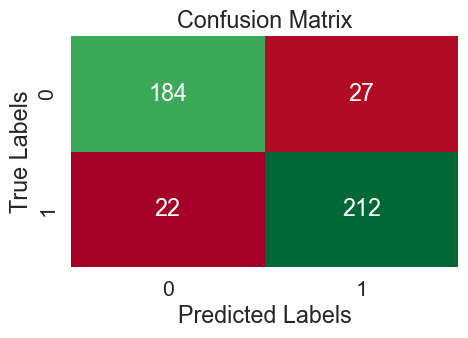

In [53]:
cm_DT = make_confusion_matrix(label_encoder.fit_transform(y_test) , preds_DT)

In [54]:
def scoring(cm):
    col_sum = [cm[0][i] + cm[1][i]  for i in range(2)]
    precision = [cm[i][i]/sum(cm[i]) for i in range(0,2)]
    recalls = [cm[i][i] / col_sum[i] for i in range(2)]
    F1_score = [(2*precision[i]*recalls[i])/ (precision[i] + recalls[i]) for i in range(2)]
    accuracy = sum(cm[i][i] for i in range(2))/sum(sum(cm))
    plt.clf()
    plt.figure(figsize=(5, 3))
    plt.scatter([0,1], precision)
    plt.scatter([0,1], recalls)
    plt.scatter([0,1], F1_score)
    plt.grid()
    plt.xlabel("class")
    plt.ylabel("metric")
    blue_patch = mpatches.Patch(color='blue',label='precision')
    orange_patch = mpatches.Patch(color='orange',label='F1_score')
    green_patch = mpatches.Patch(color='green',label='recalls')
    plt.legend(handles=[blue_patch,orange_patch,green_patch])

    # Adding the exact values on the plot
    for i in range(2):
        plt.text(i, precision[i], f'{precision[i]:.2f}', ha='center', va='bottom')
        plt.text(i, recalls[i], f'{recalls[i]:.2f}', ha='center', va='bottom')
        plt.text(i, F1_score[i], f'{F1_score[i]:.2f}', ha='center', va='bottom')
    plt.xticks([0, 1])
    plt.show()


    print(f"Precision: {precision[0]:.2f}")
    print(f"Recall: {recalls[0]:.2f}")
    print(f"F1 Score: {F1_score[0]:.2f}")
    print()

    weighted_average = sum(F1_score)/2
    micro_average = (sum(cm[i][i] for i in range(2)) / sum(sum(cm))) + (sum(cm[i][i] for i in range(2)) / sum(sum(cm))) / 2 
    macro_average = sum(F1_score)/2
    print("micro average: " + str(micro_average))
    print("weighted_average: " + str(weighted_average))
    print("macro average: " + str(macro_average))
    print("accuract: " + str(accuracy))

<Figure size 640x480 with 0 Axes>

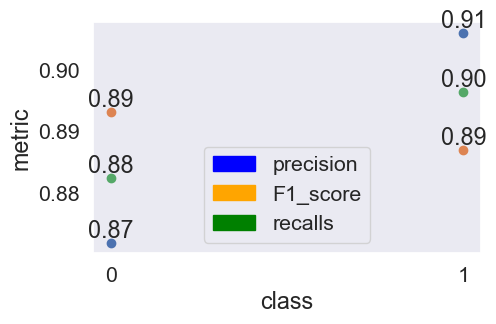

Precision: 0.87
Recall: 0.89
F1 Score: 0.88

micro average: 1.3348314606741574
weighted_average: 0.8894499622289482
macro average: 0.8894499622289482
accuract: 0.8898876404494382


In [55]:
scoring(cm_DT)

### Q20.Use GridSearchCV to find hyperparameters for models
GridSearchCV is a method provided by scikit-learn, a machine learning library in Python, that allows the systematic searching of the hyperparameter space for a given model. "CV" in GridSearchCV stands for cross-validation. It's a technique used to assess the effectiveness of a model by splitting the data into parts, where one set is used for training and the rest for testing; this process is repeated several times with different splits.

Here’s a brief overview of how GridSearchCV works:

1. **Parameter Grid**: You define a 'grid' of hyperparameter values you want to try for the model. This grid is usually specified as a dictionary, where keys are the hyperparameters, and the values are the lists of settings to be tested.

2. **Search**: GridSearchCV will systematically construct and evaluate a model for each combination of hyperparameters in your grid.

3. **Cross-Validation**: For each combination of hyperparameters, GridSearchCV uses cross-validation to provide a robust estimate of the model's performance.

4. **Selection**: Once all models have been evaluated, GridSearchCV selects the hyperparameters that yielded the best results.

5. **Refit**: By default, once the best hyperparameters are found, the model is retrained on the entire dataset.



In [56]:
from sklearn.model_selection import GridSearchCV
DecisionTreeGridSearch = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        "criterion": ["gini", "entropy"],
        "splitter": ["best", "random"],
        "max_depth": range(2, 20),
        "min_samples_split": range(2, 20),
        "min_samples_leaf": range(2, 20),
        "random_state": [84],
    },
    scoring="accuracy",
    cv= 4,
    n_jobs=-1,
)

DecisionTreeGridSearch.fit(X_train, y_train_encoded)
print(f"Best Parameters are : {DecisionTreeGridSearch.best_params_}")

Best Parameters are : {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 17, 'min_samples_split': 2, 'random_state': 84, 'splitter': 'best'}


In [57]:
preds_DT_Grid = DecisionTreeGridSearch.predict(X_test)

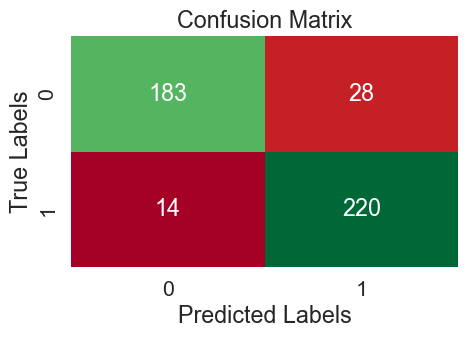

In [58]:
cm_DT_Grid = make_confusion_matrix(label_encoder.fit_transform(y_test) , preds_DT_Grid)

<Figure size 640x480 with 0 Axes>

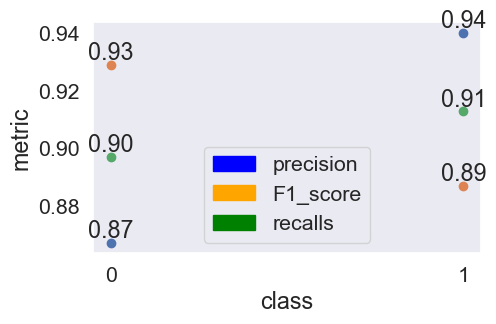

Precision: 0.87
Recall: 0.93
F1 Score: 0.90

micro average: 1.3584269662921349
weighted_average: 0.9049609470344155
macro average: 0.9049609470344155
accuract: 0.9056179775280899


In [59]:
scoring(cm_DT_Grid)

#### KNN

K-Nearest Neighbors (KNN) is a simple and widely-used machine learning algorithm used for classification and regression. It is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation.

In KNN, the input consists of the k closest training examples in the feature space, and the output depends on whether KNN is used for classification or regression:

- In KNN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of its nearest neighbor.
- In KNN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.

KNN has several hyperparameters that can be tuned to optimize its performance:

1. **Number of Neighbors (k)**: Perhaps the most important KNN hyperparameter is k, the number of neighbors to consider when making predictions. A smaller k means that noise will have a higher influence on the result, and a larger k makes the boundaries between classes less distinct.

2. **Distance Metric**: The method used to calculate the distance between data points. Common metrics include the Euclidean distance, Manhattan distance, Minkowski distance, or Hamming distance for categorical variables.

3. **Weights**:
   - *Uniform*: All neighbors contribute equally to the classification of a query point.
   - *Distance*: Closer neighbors of a query point have a greater influence than neighbors that are further away.

4. **Algorithm**:
   - *Ball Tree*: Organizes the data in a tree structure that speeds up the distance calculations for large datasets.
   - *KD Tree*: Also organizes data for efficient distance calculations, but may not be as effective as the Ball Tree for higher-dimensional data.
   - *Brute*: Uses a brute-force search, computing the distances between all pairs of samples in the dataset—a computationally expensive approach for large datasets.



In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5 , metric = "manhattan" , weights = "distance")
knn.fit(X_train.to_numpy(), y_train_encoded)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [61]:
KNN_preds = knn.predict(X_test.to_numpy())

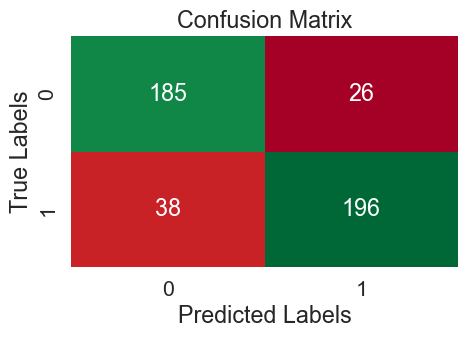

In [62]:
cm_KNN = make_confusion_matrix(label_encoder.fit_transform(y_test) , KNN_preds)

<Figure size 640x480 with 0 Axes>

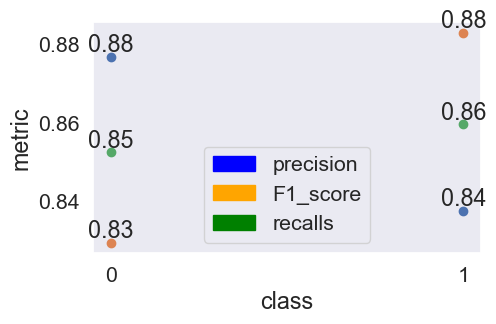

Precision: 0.88
Recall: 0.83
F1 Score: 0.85

micro average: 1.2842696629213481
weighted_average: 0.8560918425094997
macro average: 0.8560918425094997
accuract: 0.8561797752808988


In [63]:
scoring(cm_KNN)

In [65]:
import warnings
warnings.filterwarnings("ignore")
knn_grid = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid = {
    'n_neighbors': range(2, 10),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
    },
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
)
knn_grid.fit(X_train.to_numpy(), y_train_encoded)
print(f"Best Parameters : {knn_grid.best_params_}")

Best Parameters : {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


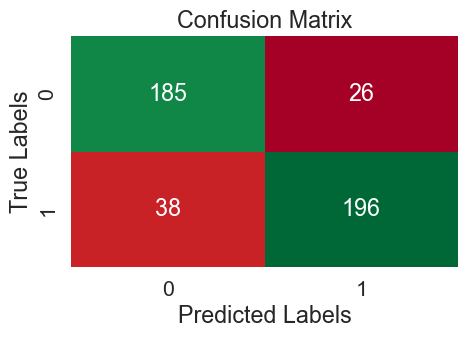

<Figure size 640x480 with 0 Axes>

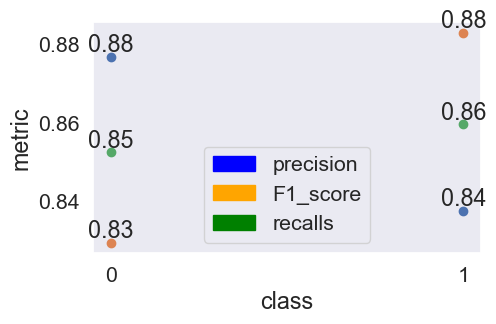

Precision: 0.88
Recall: 0.83
F1 Score: 0.85

micro average: 1.2842696629213481
weighted_average: 0.8560918425094997
macro average: 0.8560918425094997
accuract: 0.8561797752808988


In [66]:
KNN_grid_preds = knn_grid.predict(X_test.to_numpy())
cm_KNN_grid = make_confusion_matrix(label_encoder.fit_transform(y_test) , KNN_grid_preds)
scoring(cm_KNN_grid)

#### Logistic Regression

Logistic Regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although it can be extended to model several classes of events such as multinomial logistic regression. In the context of machine learning, Logistic Regression is used for classification tasks, where the goal is to determine the probability that a given input belongs to a particular category.

The probability that a feature set belongs to a category is predicted as a function of the input feature set, and the output lies between 0 and 1. This is achieved by applying a logistic function (also known as a sigmoid function) to the linear combination of the input features.

The main hyperparameters in scikit-learn's implementation of Logistic Regression (`LogisticRegression`) that you should be aware of are:

1. **penalty**: This specifies the norm of the penalty ('l1', 'l2', 'elasticnet', 'none') used to regularize the model. Regularization is a technique used to prevent overfitting by penalizing large coefficients.

2. **C**: The inverse of regularization strength; smaller values specify stronger regularization. This is the inverse of alpha for other linear models.

3. **solver**: Algorithm to use in the optimization problem. For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones. For multiclass problems, only 'newton-cg', 'sag', 'saga', and 'lbfgs' handle multinomial loss; 'liblinear' is limited to one-versus-rest classifications.

4. **multi_class**: Can be 'auto', 'ovr', 'multinomial'. If the option chosen is 'ovr', then a binary problem is fit for each label. For 'multinomial' the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. 'multinomial' is unavailable when solver='liblinear'. 'auto' selects 'ovr' if the data is binary, or if solver='liblinear', and otherwise selects 'multinomial'.

5. **max_iter**: Maximum number of iterations taken for the solvers to converge.

6. **class_weight**: Weights associated with classes. If not given, all classes are supposed to have weight one. The 'balanced' mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.

7. **l1_ratio**: The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if `penalty` is 'elasticnet'. Setting `l1_ratio` to 0 is equivalent to using L2 (ridge) regularization, while setting it to 1 is equivalent to L1 (lasso) regularization.


In [67]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(
    penalty='l2',  
    C=1.0,  
    solver='lbfgs',  
    max_iter=100, 
    multi_class='auto', 
    class_weight='balanced',  
    # l1_ratio=None  # Used only if penalty is 'elasticnet'
)
log_reg.fit(X_train, y_train_encoded)

LogisticRegression(class_weight='balanced')

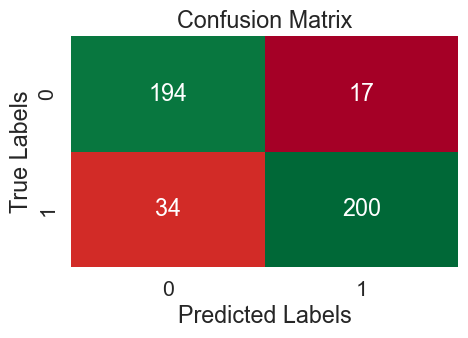

<Figure size 640x480 with 0 Axes>

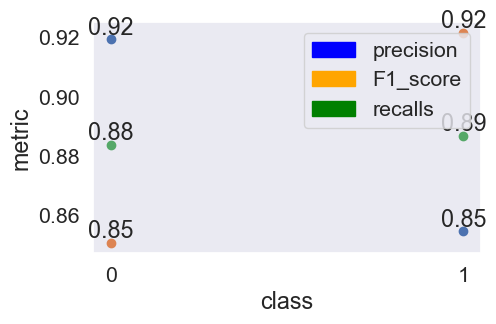

Precision: 0.92
Recall: 0.85
F1 Score: 0.88

micro average: 1.3280898876404494
weighted_average: 0.8853724196798811
macro average: 0.8853724196798811
accuract: 0.8853932584269663


In [68]:
Log_preds = log_reg.predict(X_test)
Log_cm = make_confusion_matrix(label_encoder.fit_transform(y_test) , Log_preds)
scoring(Log_cm)

In [69]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
    'C': np.logspace(-4, 4, 20),  
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],  
    'max_iter': [50, 100, 200],  
    'class_weight': [None, 'balanced'],  
    'l1_ratio': np.linspace(0, 1, 10)  # The Elastic-Net mixing parameter (0 for L2 penalty, 1 for L1 penalty)
}

logreg_cv = GridSearchCV( LogisticRegression(), param_grid, cv=5, verbose=1, n_jobs=-1)  # Using all CPU cores with n_jobs=-1
logreg_cv.fit(X_train, y_train_encoded) 

print("Best parameters found: ", logreg_cv.best_params_)


Fitting 5 folds for each of 24000 candidates, totalling 120000 fits
Best parameters found:  {'C': 0.615848211066026, 'class_weight': None, 'l1_ratio': 0.0, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}


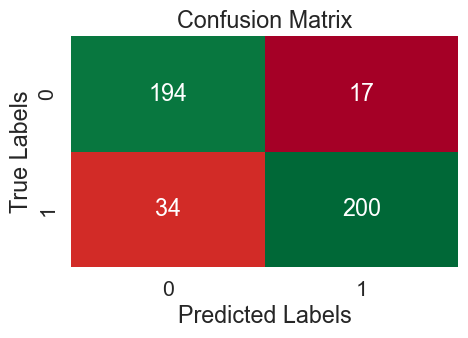

<Figure size 640x480 with 0 Axes>

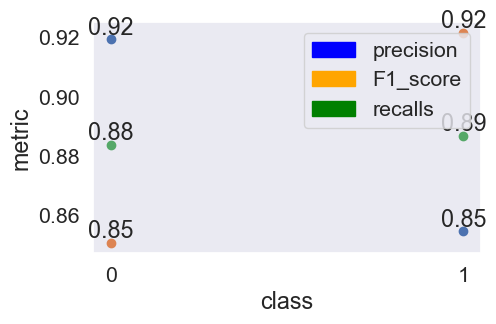

Precision: 0.92
Recall: 0.85
F1 Score: 0.88

micro average: 1.3280898876404494
weighted_average: 0.8853724196798811
macro average: 0.8853724196798811
accuract: 0.8853932584269663


In [70]:
Log_preds_cv = log_reg.predict(X_test)
Log_cm_cv = make_confusion_matrix(label_encoder.fit_transform(y_test) , Log_preds_cv)
scoring(Log_cm_cv)

### Q21.Learn about underfitting and overfitting. Did these phenomena occur in your models? 

**Underfitting** occurs when a model is too simple and is unable to capture the underlying structure of the data. Consequently, it performs poorly on the training data and does not generalize well to unseen data. Underfitting can be caused by an overly simplistic model, not enough training data, or a lack of complexity in the model to capture the signals in the data.

Signs of underfitting include:
- Low accuracy on the training data.
- The model's performance on training and validation datasets is similarly poor.
- Simplistic assumptions about the data's structure that overlook the complexities.

Strategies to combat underfitting:
- Increasing model complexity (using more features or complex model architectures).
- Using fewer features.
- Gathering more training data or constructing additional features from the existing data.
- Reducing the amount of regularization applied to the model (if any).

**Overfitting**, on the other hand, happens when a model is too complex and captures noise in the training data as if it were a real pattern. This leads to high performance on the training data but poor generalization to new, unseen data. Overfitting occurs when a model learns the details and noise in the training data to the extent that it negatively impacts the performance of the model on new data.

Signs of overfitting include:
- High accuracy on the training data, but significantly lower accuracy on validation or test data.
- The model seems to fit the training data too well, capturing noise and outliers.

Strategies to combat overfitting:
- Simplifying the model (reducing its complexity).
- Collecting more training data.
- Employing techniques such as cross-validation to get a better estimate of model performance.
- Implementing regularization techniques (like L1, L2, dropout for neural networks) that penalize overly complex models.
- Pruning the model (for decision trees) or using ensemble methods.



In [71]:
print(f"Decision Tree Accuracy for train datas: {decisionTree.score(X_train, y_train_encoded) * 100:5.2f}%")
print(f"Decision Tree Accuracy for test datas: {decisionTree.score(X_test, label_encoder.fit_transform(y_test)) * 100:5.2f}%")

print(f"KNN Accuracy for train datas: {knn.score(X_train.to_numpy(), y_train_encoded) * 100:5.2f}%")
print(f"KNN Accuracy for test datas: {knn.score(X_test.to_numpy(), label_encoder.fit_transform(y_test)) * 100:5.2f}%")

print(f"Logistic Regression Accuracy for train datas: {log_reg.score(X_train, y_train_encoded) * 100:5.2f}%")
print(f"Logistic Regression Accuracy for test datas: {log_reg.score(X_test, label_encoder.fit_transform(y_test) ) * 100:5.2f}%")

Decision Tree Accuracy for train datas: 98.43%
Decision Tree Accuracy for test datas: 88.99%
KNN Accuracy for train datas: 100.00%
KNN Accuracy for test datas: 85.62%
Logistic Regression Accuracy for train datas: 91.90%
Logistic Regression Accuracy for test datas: 88.54%


### Q22.Try to change some of the things you have done. Check their effect on the accuracy of their models. Note that the number of neighbors is sufficient for the KNN mode
Changing the hyperparameters and pre-processing methods causes a change in the accuracy of the model as well as the overfitting of the model. Above some changes have been made and optimized data has been saved

### Q23. Draw your final decision tree using the appropriate libraries

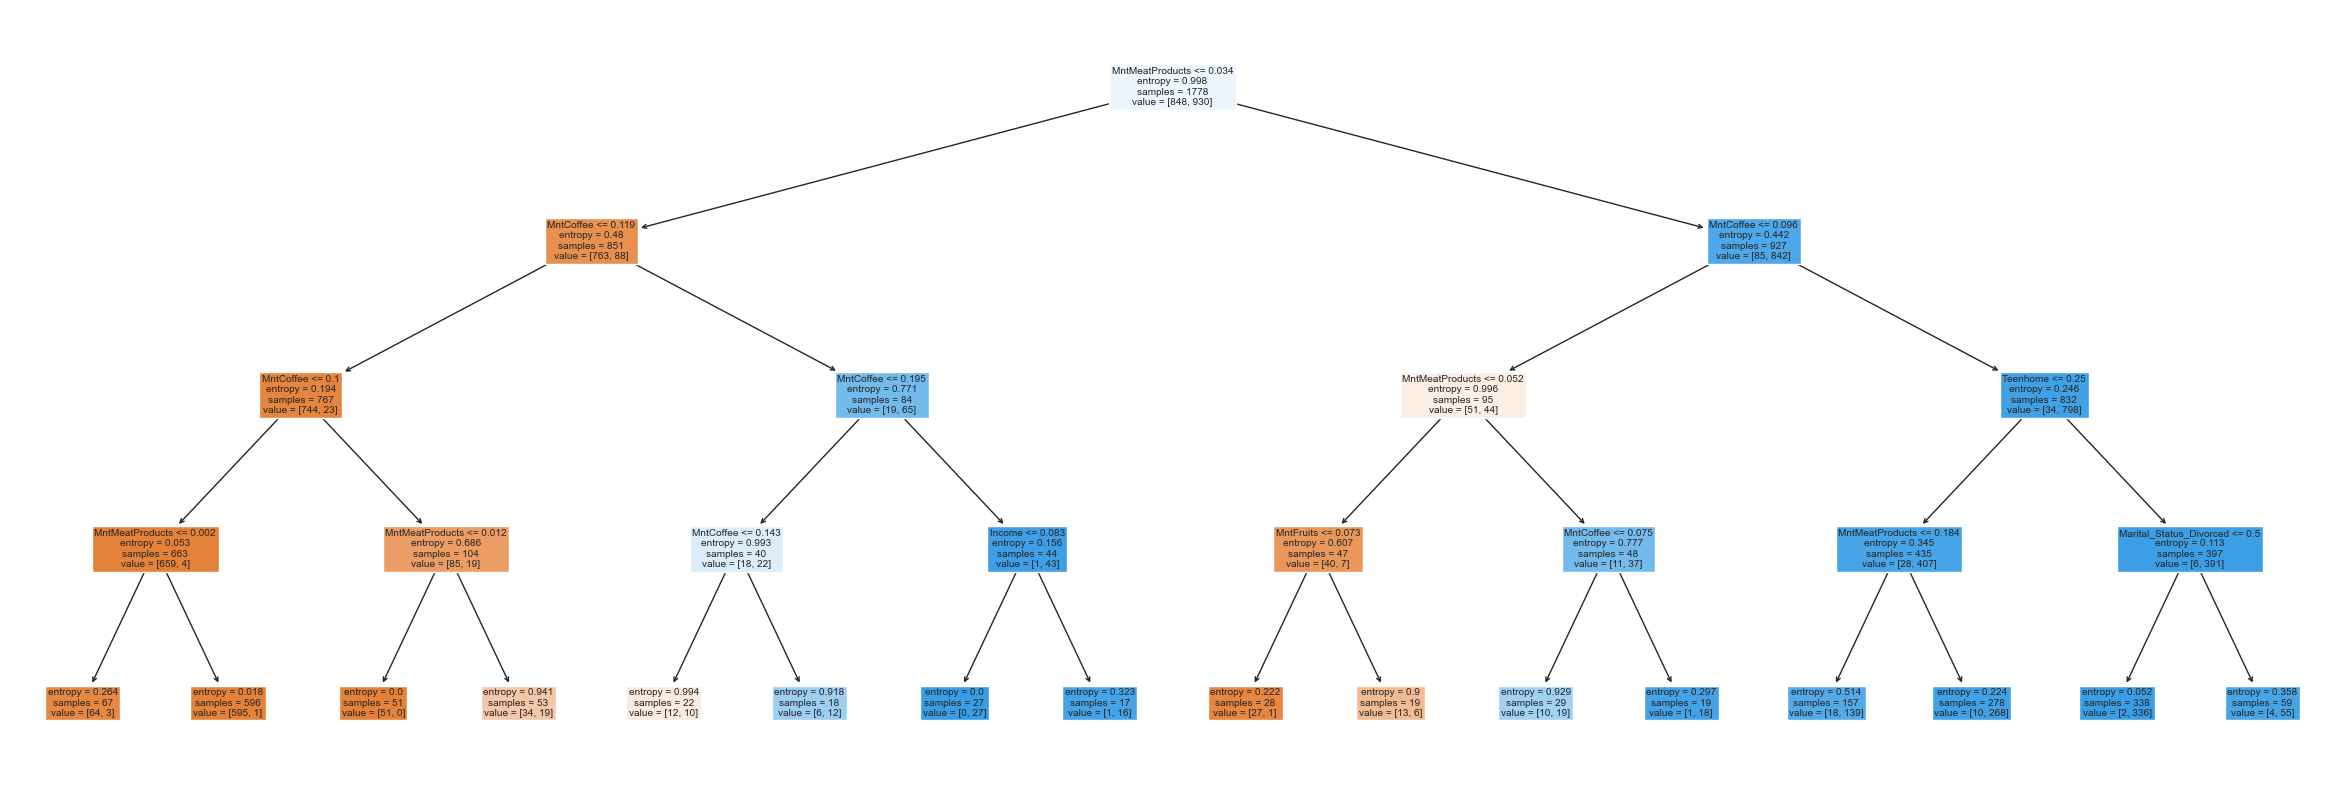

In [72]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 10))
plot_tree(
    DecisionTreeGridSearch.best_estimator_,
    filled=True,
    feature_names = X_train.columns.tolist(),
)
plt.show()


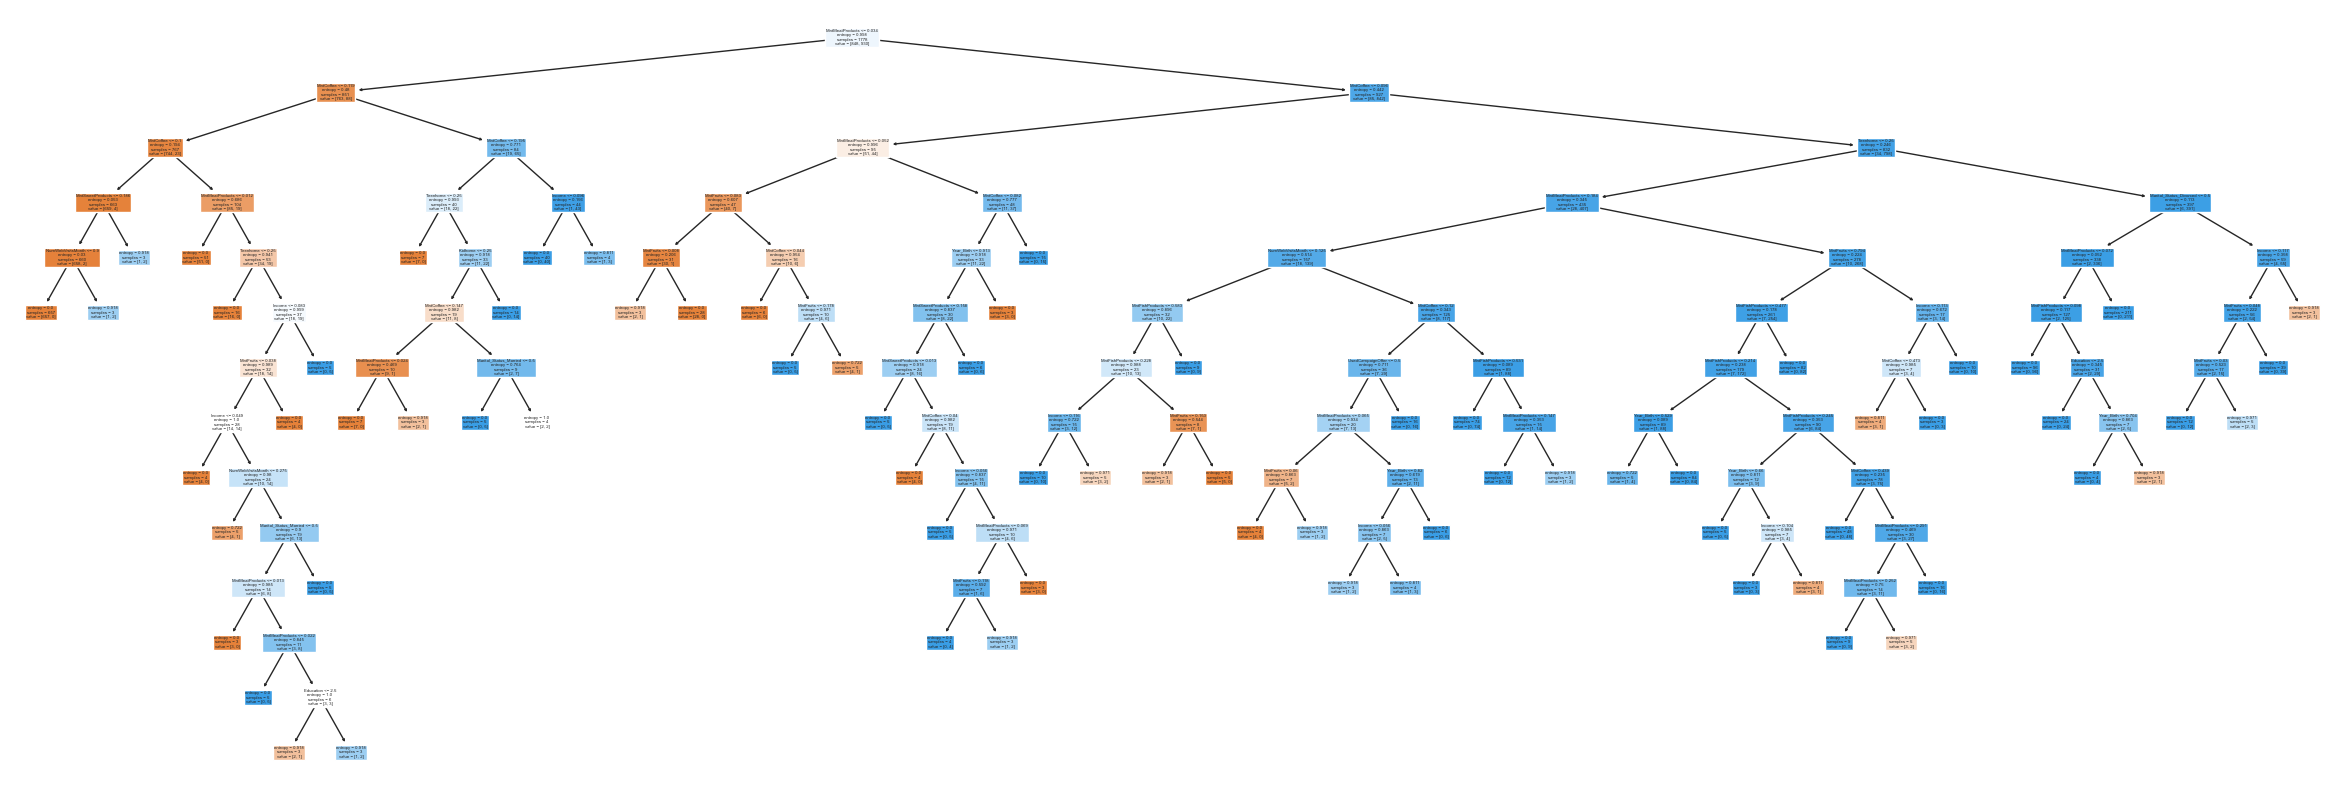

In [73]:
plt.figure(figsize=(30, 10))
plot_tree(
    decisionTree,
    filled=True,
    feature_names = X_train.columns.tolist(),
)
plt.show()

## Phase2 .Ensemble Learning

#### Random Forest
A Random Forest is an ensemble learning method used for classification, regression, and other tasks that operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

Random Forests are known for their high accuracy, robustness, and ease of use. They provide a good predictive performance without hyperparameter tuning and tend to work well with default values. They are versatile and perform well for a wide range of data types.

Here are some of the key hyperparameters for Random Forest:

1. **n_estimators**: This determines the number of trees in the forest. Generally, more trees increase performance and make the predictions more stable, but they also add to the computational cost.

2. **criterion**: The function used to evaluate the quality of a split in the decision trees. Standard options are "gini" for the Gini impurity and "entropy" for the information gain.

3. **max_depth**: The maximum depth of each tree. Deeper trees can capture more complex patterns but also can lead to overfitting.

4. **min_samples_split**: The minimum number of samples required to split an internal node. Increasing this number can prevent the model from learning too much noise and thus overfitting.

5. **min_samples_leaf**: The minimum number of samples required to be at a leaf node. This parameter has a similar effect as min_samples_split and helps to control overfitting.

6. **max_features**: The number of features to consider when looking for the best split. Options include "auto", "sqrt", "log2", or a specific number/max percentage of features to include. This affects the diversity of trees in the forest.

7. **bootstrap**: Whether bootstrap samples are used when building trees. If `False`, the whole dataset is used to build each tree.

8. **oob_score**: Whether to use out-of-bag samples to estimate the R^2 on unseen data. If `True`, it uses out-of-bag samples from the training set as a validation set.

9. **n_jobs**: Determines the number of CPU cores to use when training and predicting. `-1` means using all cores.

10. **random_state**: Controls the randomness of the bootstrapping of the samples and the features chosen for splitting at each node. It ensures that the model's results are reproducible.

11. **max_leaf_nodes**: The maximum number of terminal nodes or leaves in a tree. Can be used to control overfitting similar to max_depth.

12. **min_impurity_decrease**: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

13. **class_weight**: Weights associated with classes. This is particularly useful when dealing with imbalanced data sets.



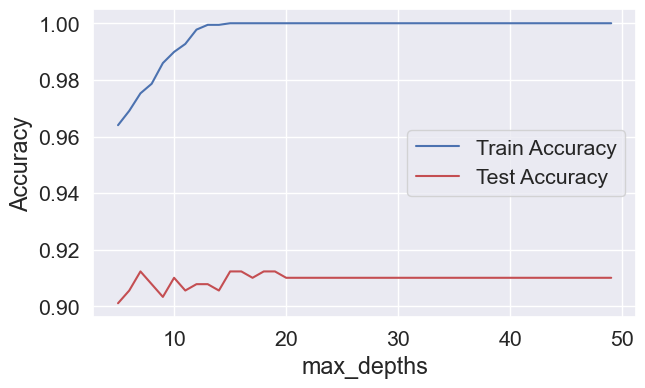

In [74]:
from sklearn.ensemble import RandomForestClassifier

plt.figure(figsize=(7, 4))

test = []
train = []
for depth in range(5,50):
    RFC = RandomForestClassifier(max_depth=depth, random_state=84)
    RFC.fit(X_train.to_numpy(), y_train_encoded)
    train.append(RFC.score(X_train.to_numpy(), y_train_encoded))
    test.append(RFC.score(X_test.to_numpy(), label_encoder.fit_transform(y_test)))
plt.plot(range(5,50), train, "b", label="Train Accuracy")
plt.plot(range(5,50), test, "r", label="Test Accuracy")
plt.legend()
plt.xlabel("max_depths")
plt.ylabel("Accuracy")
plt.show()



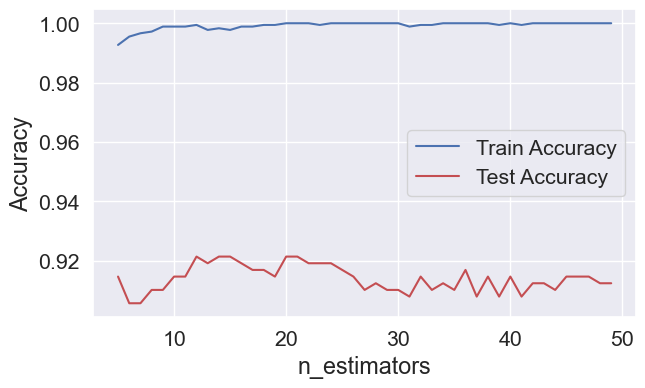

In [75]:
from sklearn.ensemble import RandomForestClassifier

plt.figure(figsize=(7, 4))

test = []
train = []
for depth in range(5,50):
    RFC = RandomForestClassifier(n_estimators=depth, random_state=84)
    RFC.fit(X_train.to_numpy(), y_train_encoded)
    train.append(RFC.score(X_train.to_numpy(), y_train_encoded))
    test.append(RFC.score(X_test.to_numpy(), label_encoder.fit_transform(y_test)))
plt.plot(range(5,50), train, "b", label="Train Accuracy")
plt.plot(range(5,50), test, "r", label="Test Accuracy")
plt.legend()
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

Adjusting the `n_estimators` in a Random Forest increases the count of decision trees that contribute to the final prediction. This typically enhances the model's stability and accuracy because it reduces variance and makes the model less sensitive to individual noise within the dataset. However, an elevated number of trees will also lead to longer training times and potentially higher computational resources consumption.

On the other hand, modifying the `max_depth` affects how deeply each tree in the forest is allowed to grow. Deeper trees can discern more intricate patterns and subtleties in the data, potentially improving the model's ability to learn from the training dataset. Yet, there's a caveat: allowing trees to grow too deep may capture noise and cause overfitting, where the model learns the details and noise from the training data too precisely and performs poorly on new data.

A careful balance is needed when increasing these hyperparameters, taking into account the complexity of the model and its ability to generalize. To mitigate potential overfitting, one should monitor the model's performance on both the training and validation datasets, preferably using cross-validation techniques to get a more robust estimate of model performance on unseen data. This iterative process aids in fine-tuning the hyperparameters to achieve a model that's neither too simple (underfit) nor too complex (overfit).

### Q25. Compare the results of this model with the Decision Tree model. Read about bias and variance and their relationship. In your opinion, in terms of each of the bias and variance of a model, Decision Tree works better or an aggregate Random Forest model? Does the result you obtained match your opinion?

The results obtained at this stage are a little better than the decision tree method.

In the realm of machine learning, crafting models that are both accurate and generalizable necessitates striking a delicate balance between two fundamental types of error: bias and variance. Each type characterizes different aspects of potential inaccuracies during model training:

- **Bias** is the error resulting from incorrect assumptions in the learning algorithm. Models with high bias tend to oversimplify, missing key relationships between features and outputs, which leads to underfitting. They fail to perform well on the training dataset and also lack generalization. Conversely, models with low bias can detect more nuanced patterns; however, they're prone to mirror the training data closely and might capture noise as true signals if not cautiously managed.

- **Variance** relates to the error introduced by model complexity. A model with high variance overfits the training data, tailoring its predictions to the idiosyncrasies rather than the signal, thus performing less effectively on new, unseen data. Lower variance models may not show as impressively on training data but generally yield more consistent predictions across different datasets.

Turning our attention to **Decision Trees and Random Forests**:

- **Decision Trees** inherently have low bias for their ability to fit the training data very closely. However, they're highly sensitive to variations in that data, leading to a high-variance scenario where the model's predictions are too reliant on the specifics of the training set.

- **Random Forests**, being ensembles that amalgamate the output of many decision trees, are typically associated with lowered variance. They aim to produce more stable predictions than a single decision tree, smoothing out anomalies by averaging results and thus avoiding overfitting. This stability is attained without incurring a substantial increase in bias.

**Cross-Validation** is a robust approach for assessing model performance. By partitioning the data and conducting several rounds of testing, this technique can provide a clearer picture of how a model is likely to perform on data outside the training set.

**Regularization** works by introducing a penalty term in the loss function that the model optimizes, which dissuades the algorithm from growing over-complex. This is particularly valuable in scenarios where the feature space is large, as it helps mitigate the risk of overfitting common in high-dimensional settings.

Ideally, a well-designed machine learning model will have enough sophistication to discern the true patterns in the data (signifying low bias) while maintaining sufficient restraint to ensure these patterns remain applicable to new data (indicating low variance). This equilibrium is a core challenge in machine learning practices, pertinent to domains that rely on predictive modeling. Through avenues like Random Forests, we make strides toward this desired balance, leveraging their built-in mechanisms to lower variance without considerably increasing bias, albeit at a greater computational expense.

In [76]:
RFC = RandomForestClassifier(n_estimators=15,max_depth= 7 , random_state=84)
RFC.fit(X_train.to_numpy(), y_train_encoded)

RandomForestClassifier(max_depth=7, n_estimators=15, random_state=84)

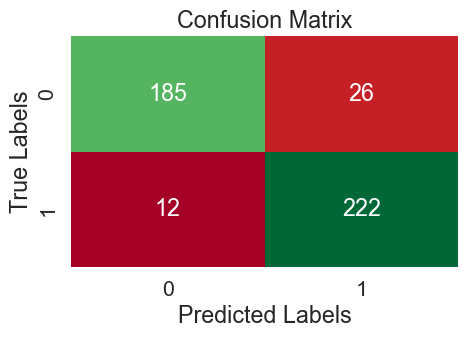

<Figure size 640x480 with 0 Axes>

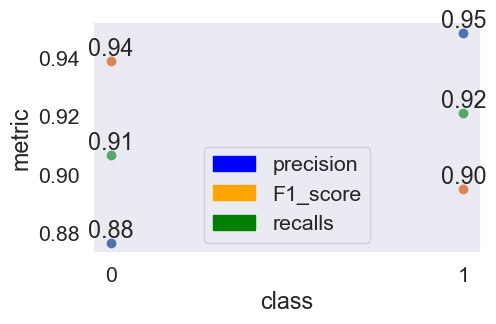

Precision: 0.88
Recall: 0.94
F1 Score: 0.91

micro average: 1.3719101123595505
weighted_average: 0.9140122854120901
macro average: 0.9140122854120901
accuract: 0.9146067415730337


In [77]:
RFC_pred = RFC.predict(X_test.to_numpy())
RFC_cm_cv = make_confusion_matrix(label_encoder.fit_transform(y_test) , RFC_pred)
scoring(RFC_cm_cv)

In [78]:
print(f"Random Forest Accuracy for train datas: {RFC.score(X_train, y_train_encoded) * 100:5.2f}%")
print(f"Random Forest Accuracy for test datas: {RFC.score(X_test, label_encoder.fit_transform(y_test)) * 100:5.2f}%")

Random Forest Accuracy for train datas: 97.47%
Random Forest Accuracy for test datas: 91.46%


## Phase3. Differential Privacy


### Q26. One of the common methods to anonymize the data set and maintain the personal security of people is to add new information to the data. What do you mean by adding new entries to the data in different rows of a dataset? Does it affect the security and privacy of people?

Adding new information to a dataset as a method of anonymization involves introducing additional information, often in the form of synthetic or 'dummy' entries, that don't correspond to real individuals. This method is referred to as adding 'noise' or using synthetic data generation to enhance privacy. The synthetic records are designed to blend in with the original data but do not represent actual individuals, which makes it harder for malicious entities to identify the real people behind the data.

Let’s delve into this in more detail:

**How It Works**:
- Synthetic data generators typically use statistical models to create data points that are consistent with the statistical distributions of the original dataset.
- These models can be complex, such as generative adversarial networks (GANs), which learn to produce new data points that are indistinguishable from the original ones.
- Noise can also be added to existing data points to mask the original values, while maintaining the overall statistical properties of the dataset.

**Impact on Security and Privacy**:
- **Enhanced Privacy**: Because the data doesn't directly represent real-world entities, it theoretically reduces the risk of personal data being traced back to an individual.
- **Preservation of Data Utility**: If done correctly, the modifications preserve the utility of the dataset for analysis purposes, since the statistical characteristics remain aligned with the original data.

**Potential Risks**:
- **Re-identification Risks**: If the synthetic data isn't sufficiently anonymized, or if attackers have access to additional external information, there's a risk of re-identification, where individuals could potentially be matched with their data within the dataset.
- **Data Integrity**: There is a delicate balance between anonymizing data and preserving its integrity. Excessive anonymization may render the data useless for its intended analytic purposes.

It is critical for those applying such methods of anonymization to understand the potential repercussions and strive for a balance that sufficiently protects privacy without stripping away the data's integrity. Using rigorous statistical methodologies and adhering to privacy laws and regulations when anonymizing datasets is crucial to protecting individual privacy while allowing for valuable data analysis.

### Q27. Among the conventional methods for adding noise to images, Laplace noise and linear noise can be mentioned. What is the difference between these two methods?

Adding noise to images is a technique often used in image processing for various purposes, including testing algorithms, enhancing robustness, and anonymizing images. Laplace noise and Gaussian noise are two common types of noise that can be added to images. Note that "linear noise" isn't a standard term in the context of image processing — you may be referring to Gaussian noise, which is often contrasted with Laplace noise due to its linear characteristics in contrast to the exponential decay in Laplace distribution.

Here's a brief overview of Laplace noise and Gaussian noise in the context of images:

**Laplace Noise**:
- Laplace noise follows a Laplace distribution, which has a sharper peak and heavier tails than a Gaussian distribution.
- Adding Laplace noise to an image introduces a pattern of noise that is more likely to produce outliers (i.e., larger deviations from the mean) due to the heavier tails of the distribution.
- It is characterized by a probability density function that decays exponentially from the center (mean), making the noise less correlated.
- This type of noise can be useful for testing the robustness of image processing algorithms against more extreme values.

**Gaussian Noise** (often incorrectly referred to as "linear noise"):
- Gaussian noise follows a Gaussian or normal distribution, which is defined by its mean and standard deviation.
- When added to an image, it contributes noise with a probability density that forms a symmetric bell-shaped curve about the mean.
- Gaussian noise often resembles natural variations in data due to its tendency to produce small, independent errors which do not drastically deviate from the mean.
- This noise is generally more predictable and is akin to the "random noise" one might see from electronic sensor noise in cameras.

In essence, the key difference between the two types of noise lies in their statistical distributions. The Laplace distribution's heavier tails mean that adding this type of noise to an image is likely to introduce more significant pixel value variations than Gaussian noise, which tends to introduce more moderate and naturally occurring variations. When applied to image data, these different types of noise can affect both the appearance of the image and the performance of image processing algorithms in different ways. Thus, the choice of noise type for a particular application should consider the specific effect each noise type has and the purpose behind adding the noise.


for variance : $$scale = \frac{{ \text{sensitivity}}}{{\epsilon}}$$
for loc : 0

In [79]:
def addNoise(data, epsilon=1.0,sensitivity=1.0):
    scale = sensitivity / epsilon
    noise = np.random.laplace(0, scale=scale, size=data.shape)
    return data + noise

In [80]:
xTrainsNoisy = []
xTestsNoisy = []
sensitivityRange = [0.1, 0.5, 1.0, 2.0]
for sensitivity in sensitivityRange:
    xTrainsNoisy.append(addNoise(X_train.to_numpy(), sensitivity=sensitivity))
    xTestsNoisy.append(addNoise(X_test.to_numpy(), sensitivity=sensitivity))

In [81]:
len(xTrainsNoisy)

4

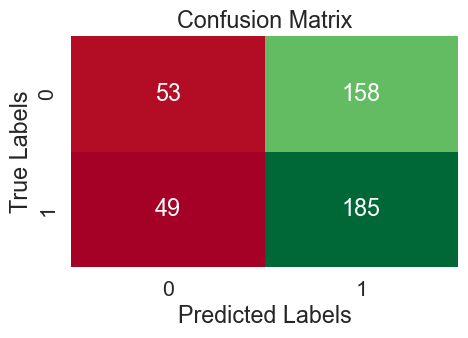

<Figure size 640x480 with 0 Axes>

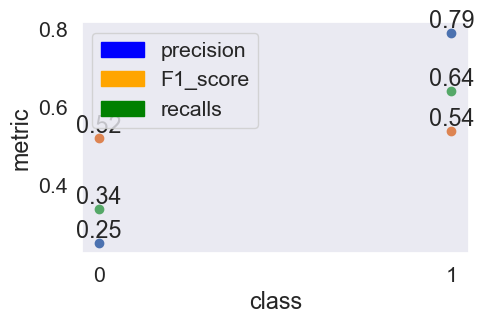

Precision: 0.25
Recall: 0.52
F1 Score: 0.34

micro average: 0.802247191011236
weighted_average: 0.48995299029352
macro average: 0.48995299029352
accuract: 0.5348314606741573


In [82]:
decisionTree_noisy = DecisionTreeClassifier(
    criterion='entropy', 
    #splitter='random',   
    #max_depth=3,        
    min_samples_split=3, 
    min_samples_leaf=3,  
    random_state=42       
)
decisionTree_noisy.fit(xTrainsNoisy[2], y_train_encoded)
preds_DT_noisy = decisionTree.predict(xTestsNoisy[2])
cm_DT_noisy = make_confusion_matrix(label_encoder.fit_transform(y_test) , preds_DT_noisy)
scoring(cm_DT_noisy)

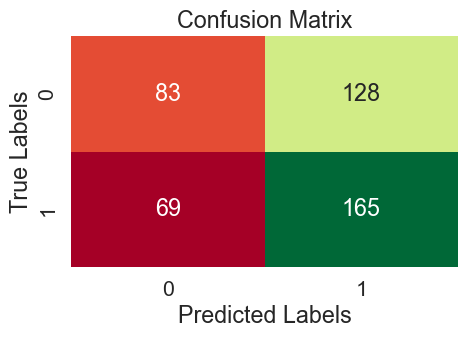

<Figure size 640x480 with 0 Axes>

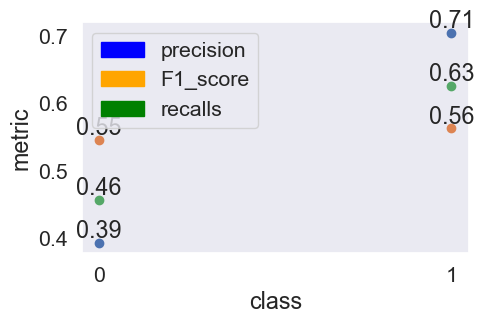

Precision: 0.39
Recall: 0.55
F1 Score: 0.46

micro average: 0.8359550561797753
weighted_average: 0.5417431168681817
macro average: 0.5417431168681817
accuract: 0.5573033707865168


In [83]:
knn_noisy = KNeighborsClassifier(n_neighbors=5 , metric = "manhattan" , weights = "distance")
knn_noisy.fit(xTrainsNoisy[2], y_train_encoded)
KNN_preds_noisy = knn.predict(xTestsNoisy[2])
cm_KNN_noisy = make_confusion_matrix(label_encoder.fit_transform(y_test) , KNN_preds_noisy)
scoring(cm_KNN_noisy)

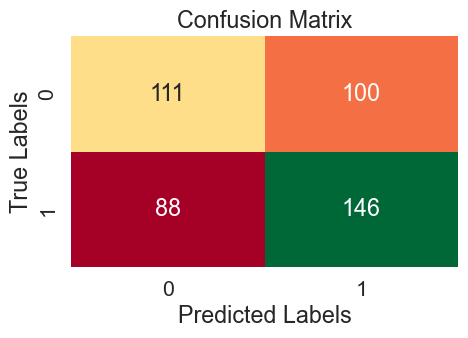

<Figure size 640x480 with 0 Axes>

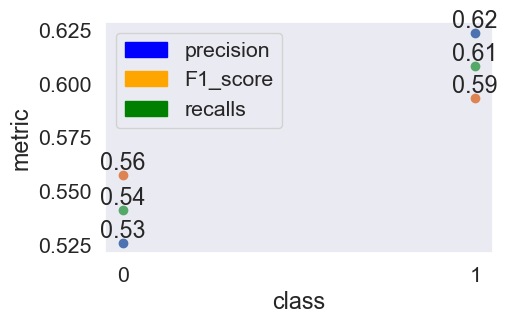

Precision: 0.53
Recall: 0.56
F1 Score: 0.54

micro average: 0.8662921348314607
weighted_average: 0.5748983739837399
macro average: 0.5748983739837399
accuract: 0.5775280898876405


In [84]:
log_reg_noisy = LogisticRegression(
    penalty='l2',  
    C=1.0,  
    solver='lbfgs',  
    max_iter=100, 
    multi_class='auto', 
    class_weight='balanced',  
    # l1_ratio=None  # Used only if penalty is 'elasticnet'
)
log_reg_noisy.fit(xTrainsNoisy[2], y_train_encoded)
Log_preds_noisy = log_reg.predict(xTestsNoisy[2])
Log_cm_noisy = make_confusion_matrix(label_encoder.fit_transform(y_test) , Log_preds_noisy)
scoring(Log_cm_noisy)

In [85]:
print(f"Decision Tree Accuracy for train datas: {decisionTree_noisy.score(xTrainsNoisy[2], y_train_encoded) * 100:5.2f}%")
print(f"Decision Tree Accuracy for test datas: {decisionTree_noisy.score(xTestsNoisy[2], label_encoder.fit_transform(y_test)) * 100:5.2f}%")

print(f"KNN Accuracy for train datas: {knn_noisy.score(xTrainsNoisy[2], y_train_encoded) * 100:5.2f}%")
print(f"KNN Accuracy for test datas: {knn_noisy.score(xTestsNoisy[2], label_encoder.fit_transform(y_test)) * 100:5.2f}%")

print(f"Logistic Regression Accuracy for train datas: {log_reg_noisy.score(xTrainsNoisy[2], y_train_encoded) * 100:5.2f}%")
print(f"Logistic Regression Accuracy for test datas: {log_reg_noisy.score(xTestsNoisy[2], label_encoder.fit_transform(y_test) ) * 100:5.2f}%")

Decision Tree Accuracy for train datas: 95.28%
Decision Tree Accuracy for test datas: 49.44%
KNN Accuracy for train datas: 100.00%
KNN Accuracy for test datas: 52.13%
Logistic Regression Accuracy for train datas: 59.62%
Logistic Regression Accuracy for test datas: 60.22%


## Phase4. Bonus: methods based on gradient boosting

### Q29.What is Gradient-boosting ? What is the difference between Boosting Tree and Decision Tree?

**Gradient Boosting** is a machine learning technique used for regression and classification problems. It builds on the logic of boosting, which combines the output of several weak learners to create a strong learner, usually in an iterative fashion. Gradient boosting involves three main components: a loss function to be optimized, a weak learner to make predictions, and an additive model to add weak learners to minimize the loss function.

Here’s how gradient boosting works in general:

1. **Loss Function to Optimize**: Gradient boosting is applicable to any differentiable loss function. The choice of loss function depends on the type of problem being solved (regression, classification, etc.).

2. **Weak Learner**: The weak learner in gradient boosting is typically a decision tree. These are short trees, sometimes called "stumps." They are weak in the sense that they do only slightly better than random guessing.

3. **Additive Model**: Trees are added one at a time to the ensemble, and each new tree helps to correct errors made by the previously trained tree. Unlike in bagging (Random Forests), trees are not trained independently of one another, but rather the outcomes of earlier tree predictions inform subsequent trees so that the next tree trained is trained to improve the mistakes of the prior one.

The gradient boosting procedure can be summarized in the following steps:

- Train an initial decision tree to the data and predict the outputs.
- Calculate the residuals (difference between predicted and true values).
- Train a new decision tree focused on correctly predicting the previous residuals.
- Add this new decision tree to the ensemble, typically with a small learning rate or multiplier to ensure that each tree only makes a controlled impact to the overall model (this slows down the training process but generally results in a more robust model).
- Iterate this process for a fixed number of trees or until residuals are minimized.

**Differences Between Boosting Trees and Decision Trees**:

- **Complexity**: A single decision tree is typically a "strong learner," a standalone model formed by repeatedly splitting the data based on certain features. Boosted trees, however, are "weak learners," with each one built in sequence to improve on the last, leading to a more complex overall model.

- **Performance**: Boosting trees frequently have better predictive accuracy than a single decision tree due to their sequential corrections of errors.

- **Risk of Overfitting**: While any model can overfit if not properly tuned or constrained, decision trees are especially prone to this when they grow deep. Boosting trees can also overfit, but the sequential nature of adding trees that correct previous errors usually makes them less prone to this problem, especially when using techniques such as gradient boosting with regularization (e.g., shrinkage).

- **Interpretability**: A single decision tree is generally more interpretable than boosted trees since you can easily visualize the tree and understand the path from root to leaf and the decisions made at each junction. Boosting involves combining multiple trees, which makes the decision process more complex and harder to visualize.

In summary, gradient boosting is a powerful algorithm that builds a series of weak learners in a strategic way to create a model that reduces error and increases predictive accuracy, whereas a decision tree is a simpler, standalone model that can serve as either a weak learner within a boosted ensemble or a strong learner on its own.

### Q30.Explain how XG-boost works.

XGBoost stands for eXtreme Gradient Boosting. It is an implementation of gradient boosting machines (GBM) that has been designed to be highly efficient, flexible, and portable. XGBoost has gained a lot of popularity in machine learning competitions due to its performance and speed.

XGBoost works similar to gradient boosting in terms of creating a model in the form of an ensemble of weak decision tree learners in an iterative fashion. Here are the key features and steps that characterize XGBoost:

1. **Gradient Boosting Framework**: It uses the gradient boosting framework to optimize differentiable loss functions, with decision trees as the base learners. A new tree is added at each iteration, and it aims to correct the errors of the previous ensemble.

2. **Regularization**: XGBoost improves upon the standard GBM framework by adding a regularization penalty (L1 and L2) on the weights of the trees, which controls over-fitting and gives better performance.

3. **Handling Sparse Data**: XGBoost is designed to handle sparsity in data, meaning that it can handle data with lots of missing values effectively. It automatically learns what is the best direction to take for missing values while splitting a node.

4. **System Design**: XGBoost is designed for efficiency of compute time and memory resources. For example, the system can parallelize the building of trees across all of your computer's CPUs, and it features cache awareness and out-of-core computing for very large datasets.

5. **Block Structure to support the parallelization of tree construction**: It constructs a block structure to represent the data, which allows for the reuse of the structure during model training. It helps to cut down on the computation time.

6. **Tree Pruning**: XGBoost uses a depth-first approach, unlike the traditional breadth-first approach of GBMs, potentially leading to better loss reductions during the pruning of trees.

7. **Cross-validation at each iteration**: It incorporates a built-in routine to perform CV at each iteration of the boosting process, which provides a reliable guide to stopping to reduce the risk of overfitting.

8. **Handling Different Types of Data**: It works well with not only numerical and categorical features but also user-defined features in varied domains.

The algorithm starts by initializing the model with a single tree or even a constant value and then enters into a loop which involves the following steps:

- Computing gradient statistics for each tree leaf.
- Using these statistics to grow the tree, optimizing for maximum gain when splitting each node.
- The gain is calculated through a specific objective function that includes both the loss term and the regularization term.
- After the tree is grown, a weight is calculated for each leaf that will minimize the loss function, again factoring in regularization.

The above steps are repeated to add trees, usually hundreds or thousands, each time correcting the residuals of the ensemble thus far. The user must specify a few parameters that control the size and shape of the trees—such as the depth of trees, the minimum child weight, and the maximum delta step of each tree's weight—and regularisation parameters.


### Q31. Run XG-boost.

XGBoost hyperparameters are the configuration settings that are used to optimize the performance of the XGBoost algorithm. Proper tuning of these parameters can lead to more accurate models, though it requires careful consideration as incorrect tuning may lead to underfitting or overfitting.

Some of the key XGBoost hyperparameters include:

1. **General Parameters**:
   - `booster`: Selects the type of model to run at each iteration. It can be `gbtree` (tree-based models), `gblinear` (linear models), or `dart` (Dropouts meet Multiple Additive Regression Trees).
   - `nthread`: Number of parallel threads used to run XGBoost.

2. **Booster Parameters**:
   - `eta` (also known as `learning_rate`): Step size shrinkage used to prevent overfitting. Range is [0,1].
   - `min_child_weight`: Minimum sum of instance weight (hessian) needed in a child. Higher values prevent overfitting.
   - `max_depth`: Maximum tree depth for base learners. Increasing this value makes the model more complex and may lead to overfitting.
   - `max_leaf_nodes`: Maximum number of terminal nodes or leaves in a tree.
   - `gamma` (also known as `min_split_loss`): Minimum loss reduction required to make a further partition on a leaf node of the tree.
   - `subsample`: Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost randomly sampled half of the training data prior to growing trees.
   - `colsample_bytree`: Subsample ratio of columns when constructing each tree.
   - `colsample_bylevel`: Subsample ratio of columns for each split, in each level.
   - `colsample_bynode`: Subsample ratio of columns for each split, in each node.
   - `lambda` (also known as `reg_lambda`): L2 regularization term on weights. Higher values prevent overfitting.
   - `alpha` (also known as `reg_alpha`): L1 regularization term on weights.

3. **Learning Task Parameters**:
   - `objective`: Specifies the learning task and the corresponding learning objective. Examples include `reg:squarederror` for regression tasks, `binary:logistic` for binary classification, `multi:softmax` for multiclass classification using the softmax objective, and `rank:pairwise` for ranking tasks.
   - `eval_metric`: Evaluation metrics for validation data, a default metric will be assigned according to objective (`rmse` for regression problems, `error` for classification, etc.).
   - `seed`: Random number seed.



Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best parameters found: {'colsample_bytree': 0.6, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.8}
Best accuracy found: 0.9566963675311061


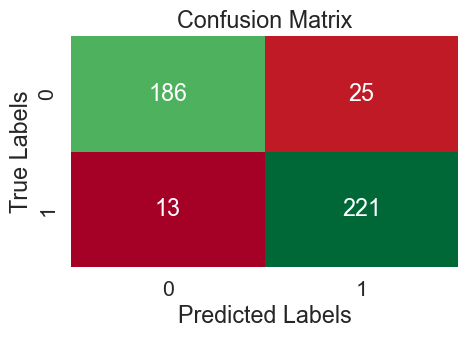

<Figure size 640x480 with 0 Axes>

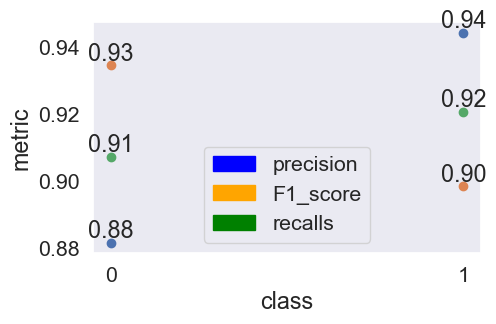

Precision: 0.88
Recall: 0.93
F1 Score: 0.91

micro average: 1.3719101123595505
weighted_average: 0.9140752032520325
macro average: 0.9140752032520325
accuract: 0.9146067415730337


In [86]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False)

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train.to_numpy(), y_train_encoded)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy found: {grid_search.best_score_}")

best_estimator = grid_search.best_estimator_
XGB_preds = best_estimator.predict(X_test.to_numpy())
XGB_cm = make_confusion_matrix(label_encoder.fit_transform(y_test) , XGB_preds)
scoring(XGB_cm)